# HOUSING DATA PROJECT

** Data Loading And Setup**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATA SET DESCRIPTION:-**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing_data.csv")
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.tail()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[5 rows x 81 columns]

The dataset contains 1460 observations and 81 features, including both numerical and categorical variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The housing dataset contains 1460 rows and 81 columns. most of the variables have complete data with no missing values. However a few columns contain null values. The column** Alley** has a large number of missing values because many houses do not have alley acess. The column **MasVnrType** contains missing values for houses where masonry veneer is not present. The **GarageYrBlt** column has missing values for houses that do not have a garage. The** Electrical **column contains only one missing value, which may be due to a data entry issue.
These missing values do not indicate errors in the dataset but represent the absence of certain house features. During data preprocessing categorical missing values can be replaced with "None", and numerical missing values can be handled using appropriate statistical methods such as mean or median.

In [ ]:
df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342  1971.267808   
std      34.664304    9981.264932     1.382997     1.112799    30.202904   
min       0.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      42.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      63.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      79.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

This step provides a statistical summary of numerical variables in the housing dataset.

# Statistical Overview Of Sale Price:-

In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

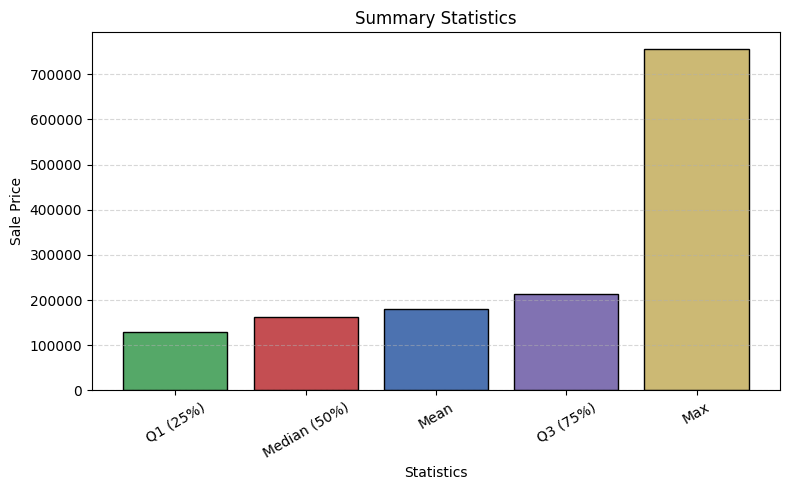

In [ ]:
# Summary Statistics
df['SalePrice'].describe()
stats = {
    'Q1 (25%)': 129975,
    'Median (50%)': 163000,
    'Mean': 180921,
    'Q3 (75%)': 214000,
    'Max': 755000
}
colors = ['#55A868', '#C44E52', '#4C72B0', '#8172B2', '#CCB974']
plt.figure(figsize=(8,5))
plt.bar(stats.keys(), stats.values(),color=colors,edgecolor='black')
plt.xlabel("Statistics")
plt.ylabel("Sale Price")
plt.title('Summary Statistics')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Summary statistics help in understanding data distribution,identifying skewness,detecting outliers,and deciding suitable preprocessing steps before analysis or modeling.

# Missing Values:-

In [ ]:
# Handle missing values
df['Alley'] = df['Alley'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

Electrical       1
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
print(df['Electrical'].isnull().sum())

0


Missing values were handled using appropriate imputation techniques. Categorical variables were filled with meaningful labels,numerical variables were filled with suitable values, and columns with minimal missing data were imputed using the mode. A final check confirmed no missing values remained.

# Duplicates And Outliers:-

In [ ]:
# Removing duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [ ]:
# addressing anomalies/outliers
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Detect outliers
  outliers = df[(df[col]<lower_bound)]
  outliers = df[(df[col]>upper_bound)]
  # count outliars
  print(f"{col}: {len(outliers)} outliers")

Unnamed: 0: 0 outliers
LotFrontage: 16 outliers
LotArea: 67 outliers
OverallQual: 0 outliers
OverallCond: 94 outliers
YearBuilt: 0 outliers
YearRemodAdd: 0 outliers
MasVnrArea: 98 outliers
BsmtFinSF1: 7 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 29 outliers
TotalBsmtSF: 24 outliers
1stFlrSF: 20 outliers
2ndFlrSF: 2 outliers
LowQualFinSF: 26 outliers
GrLivArea: 31 outliers
BsmtFullBath: 1 outliers
BsmtHalfBath: 82 outliers
FullBath: 0 outliers
HalfBath: 0 outliers
BedroomAbvGr: 29 outliers
KitchenAbvGr: 67 outliers
TotRmsAbvGrd: 30 outliers
Fireplaces: 5 outliers
GarageYrBlt: 0 outliers
GarageCars: 5 outliers
GarageArea: 21 outliers
WoodDeckSF: 32 outliers
OpenPorchSF: 77 outliers
EnclosedPorch: 208 outliers
3SsnPorch: 24 outliers
ScreenPorch: 116 outliers
PoolArea: 7 outliers
MiscVal: 52 outliers
YrSold: 0 outliers
SalePrice: 61 outliers


In [ ]:
df=df.drop(columns=['Unnamed: 0'])

The dataset was checked for duplicate records using the duplicated() method. No duplicate rows were found,ensuring data consistency. Outliers were detected using the IQR method prior to analysis process to understand the presence of extreme values in the dataset. The actual treatment of outliers was performed selectively after visual interpretation to ensure that genuine observation were retained.

**Note**- Categorical Variables were not converted into integers during EDA phase because the objective was to understand data patterns and relatiionships , not to build predictive models.

# Separate Variables Types:-

In [ ]:
# Numerical and Categorical Variables:-
num_vars = df.select_dtypes(include=['int64', 'float64']).columns
cat_vars = df.select_dtypes(include=['object']).columns

print("Numerical Variables:", len(num_vars))
print("Categorical Variables:", len(cat_vars))

Numerical Variables: 36
Categorical Variables: 45


**EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS:-**

# Univariate Analysis:-

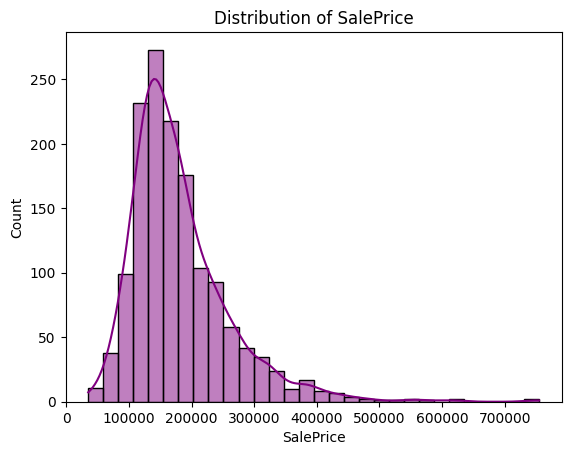

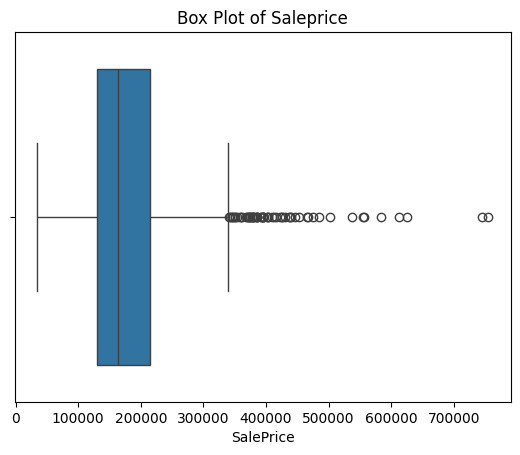

In [ ]:
# Target Variable (Sale Price)
plt.figure()
sns.histplot(df['SalePrice'], kde=True, bins=30, color='purple')
plt.title('Distribution of SalePrice')
plt.show()

plt.figure()
sns.boxplot(x=df['SalePrice'])
patch_artist=True,
boxprops=dict(facecolor='lightcoral', color='black'),
whiskerprops=dict(color='black'),
capprops=dict(color='yellow'),
medianprops=dict(color='yellow'),
flierprops=dict(marker='o',
                markerfacecolor='red',
                markersize=5,
                linestyle='none')
plt.title('Box Plot of Saleprice')
plt.show()

**Interpretation for histogram:**
The histograms and KDE plot of SalePrice indicate a positively skewed distribution, with most properties concentrated in the lower to mid price range and a long right tail representing high-priced houses.The box plot confirms the presence of outliers, which are expected in real world housing data.

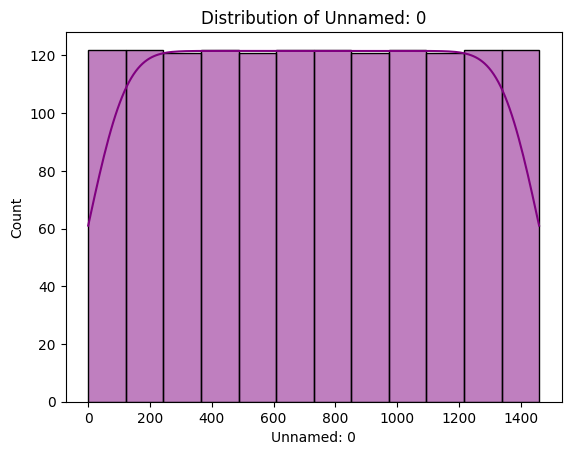

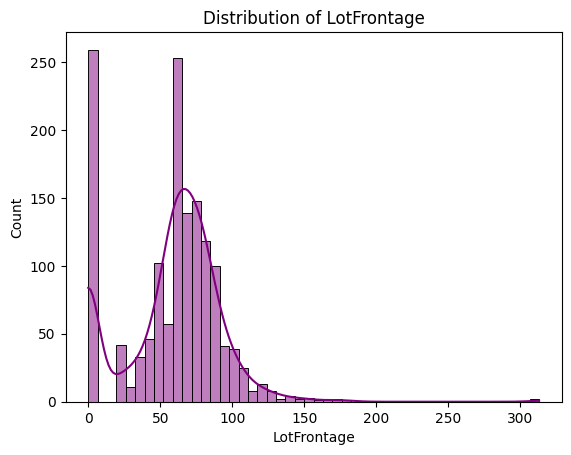

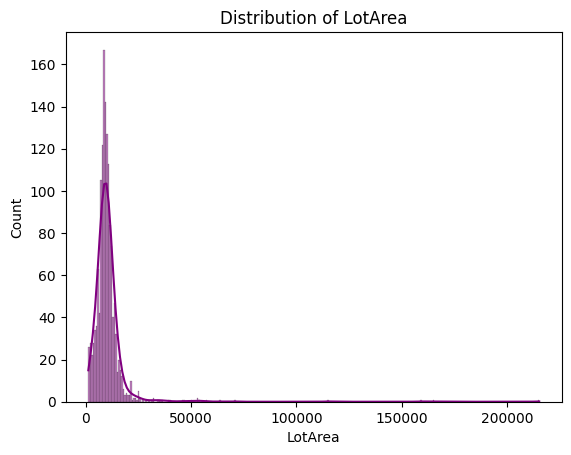

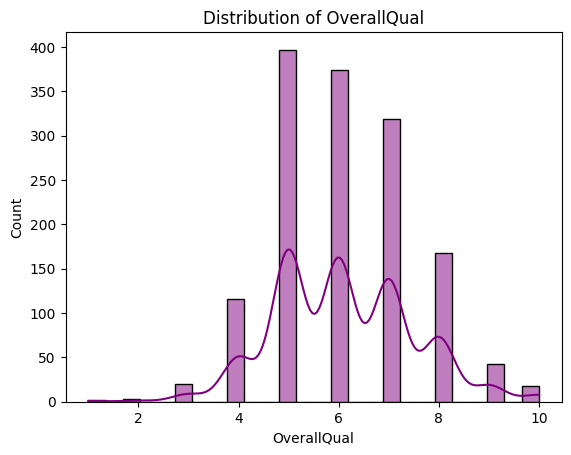

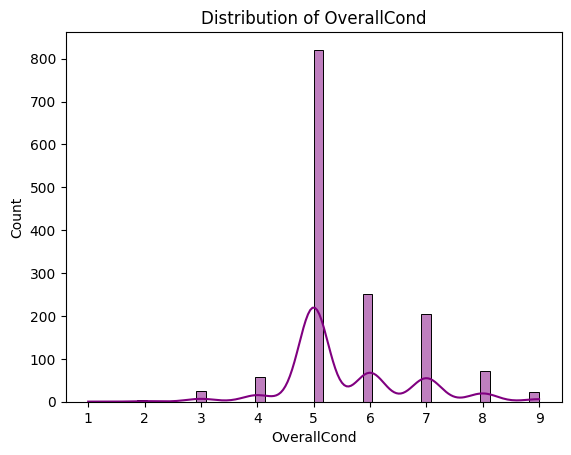

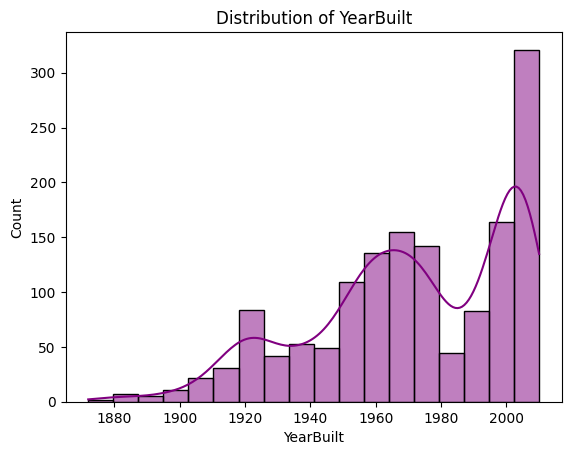

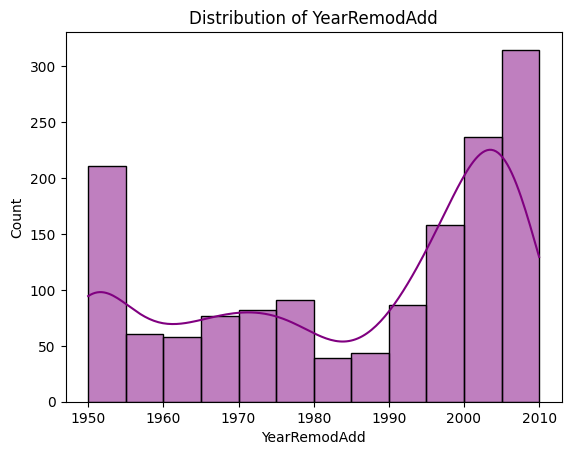

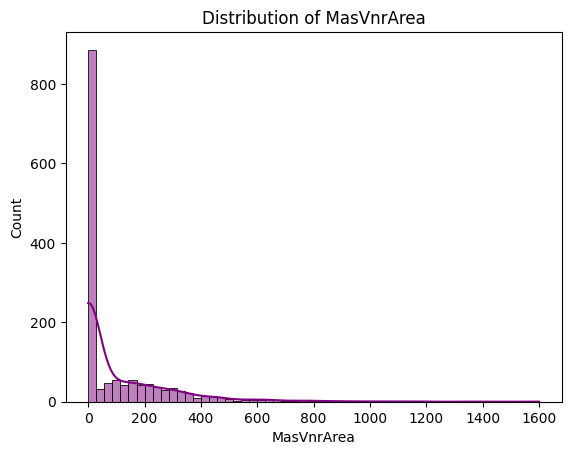

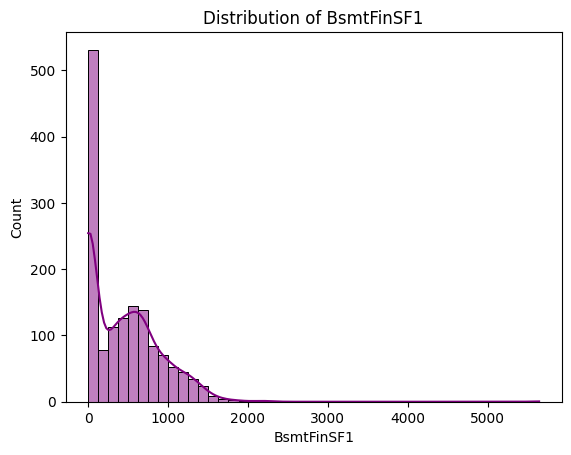

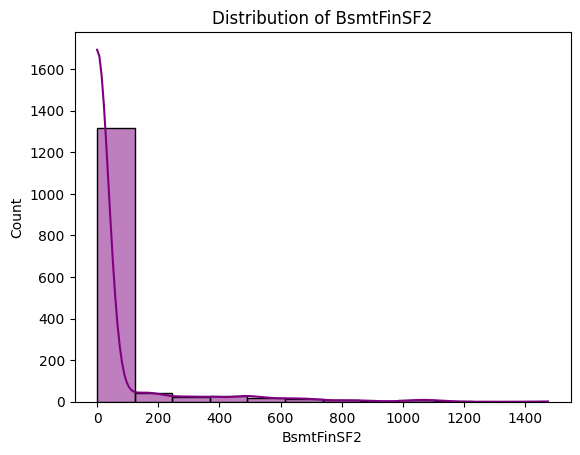

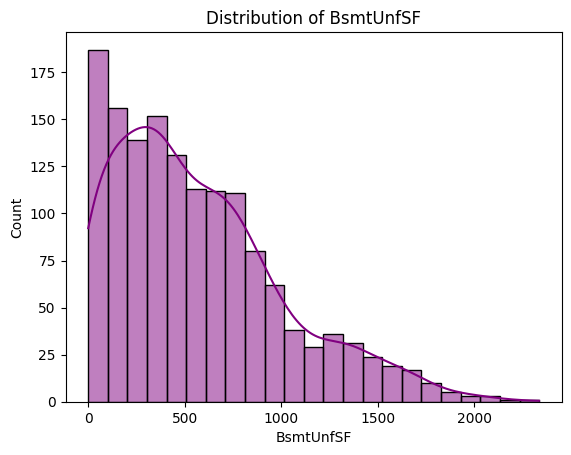

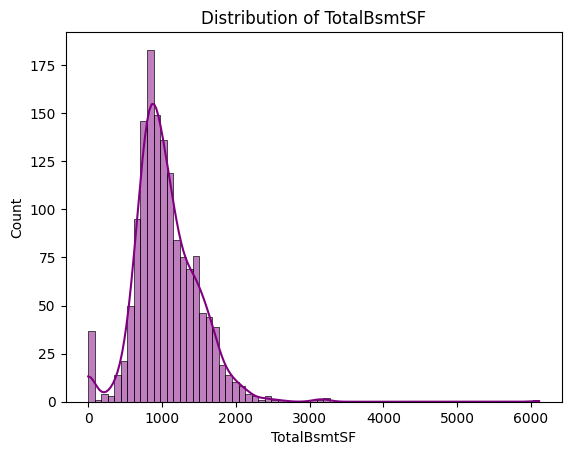

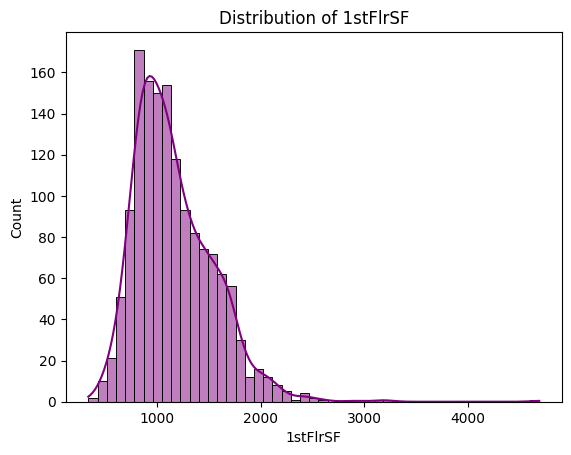

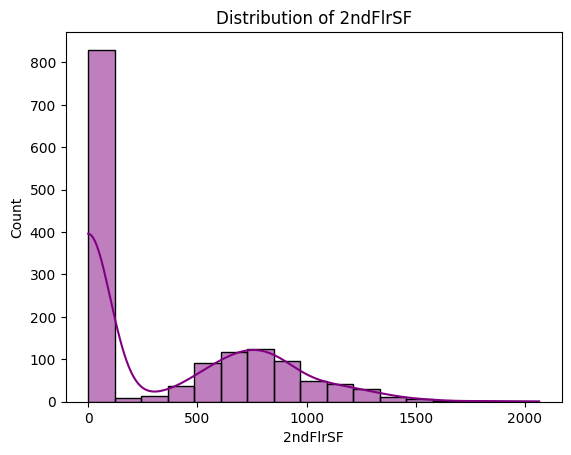

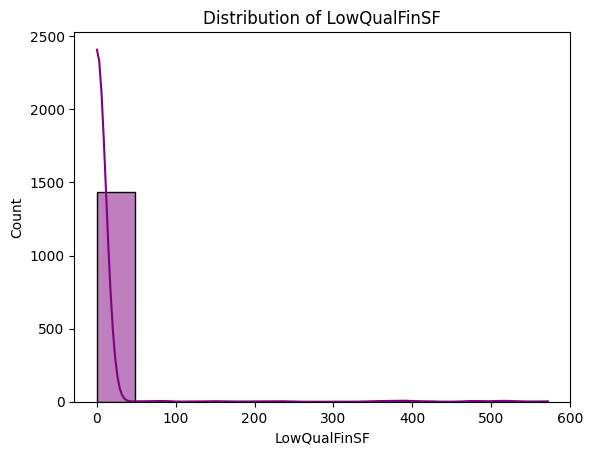

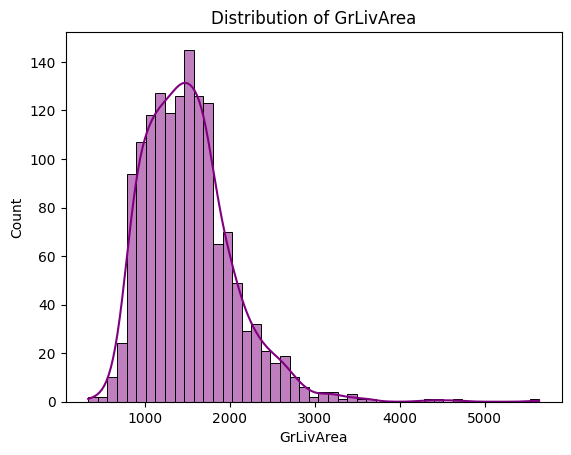

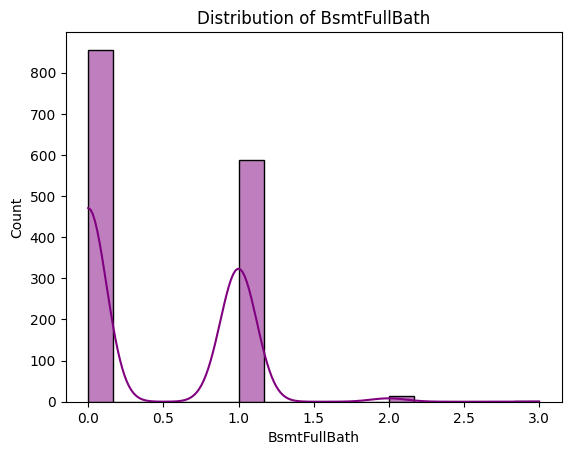

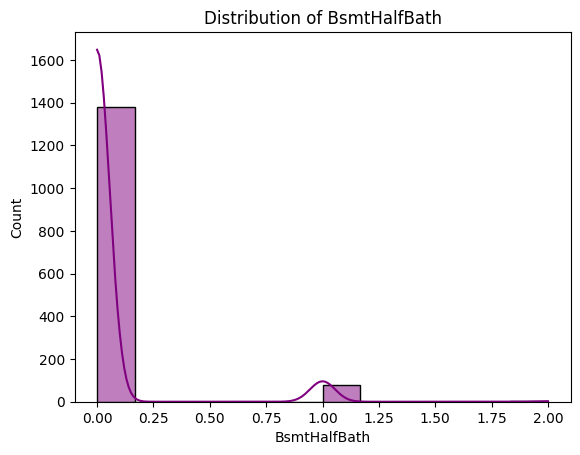

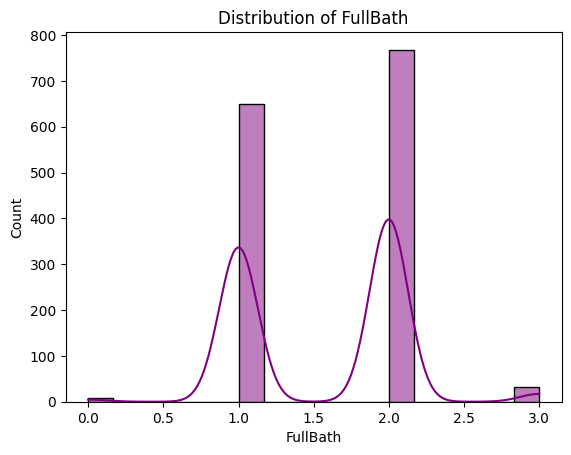

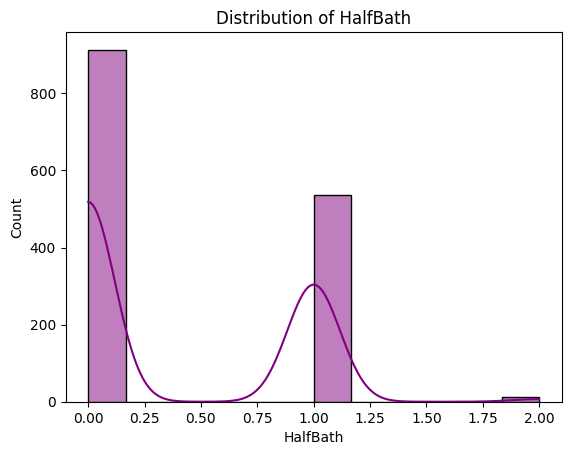

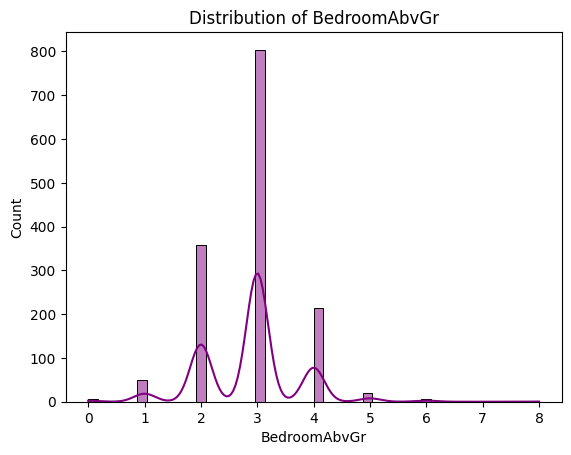

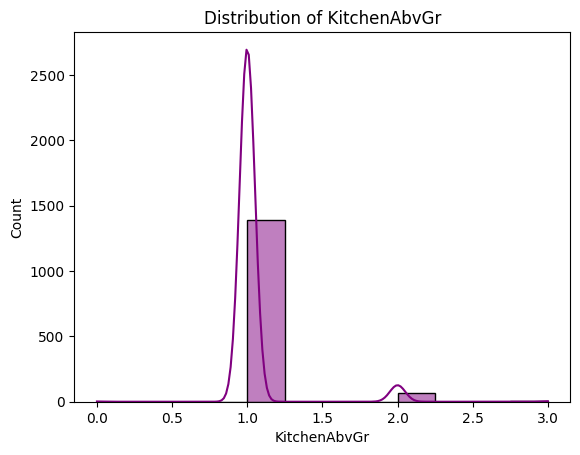

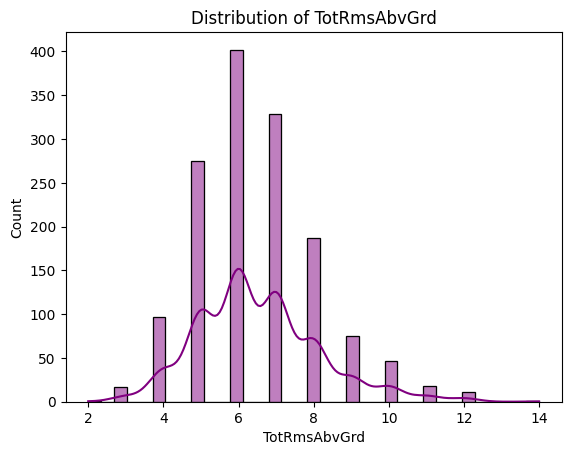

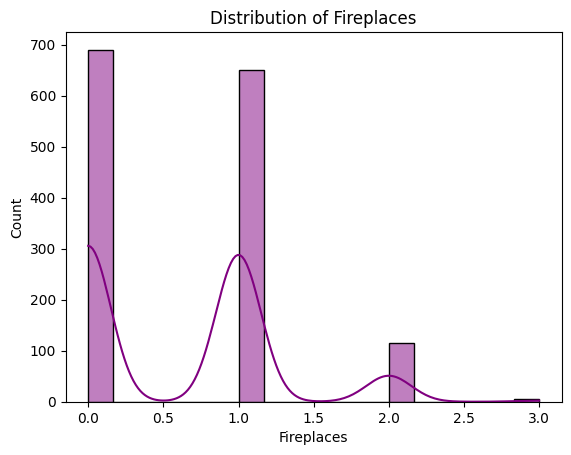

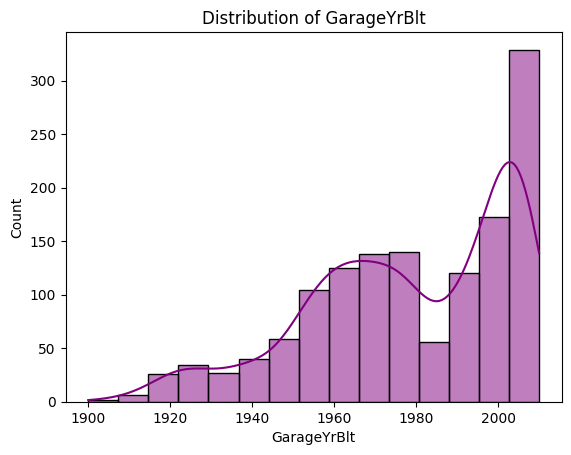

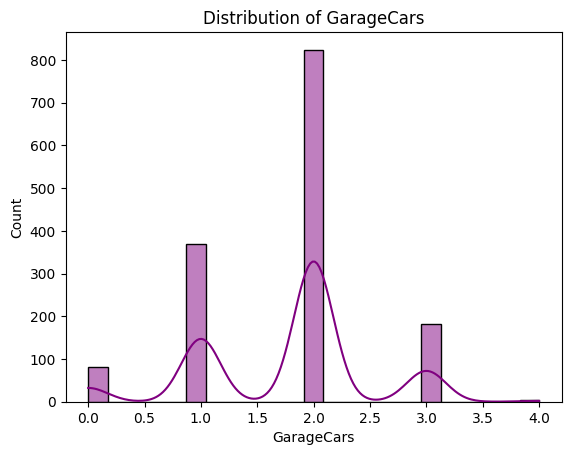

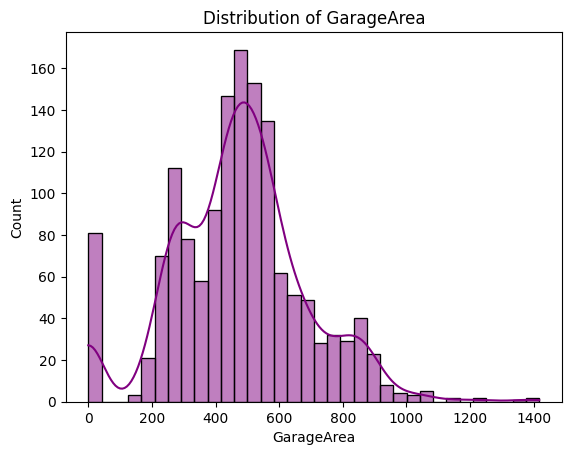

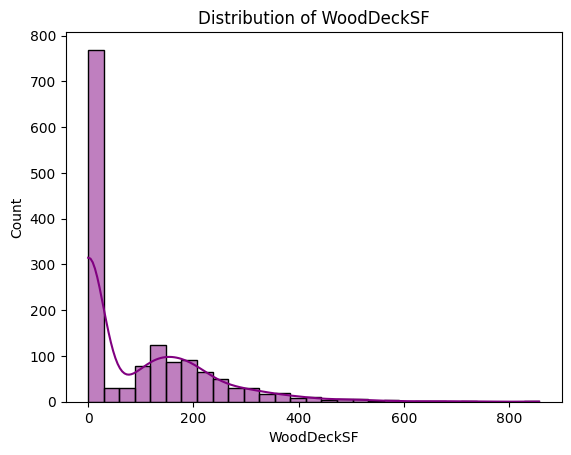

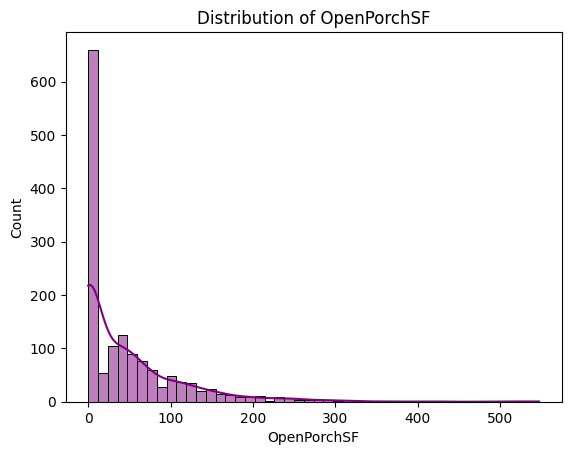

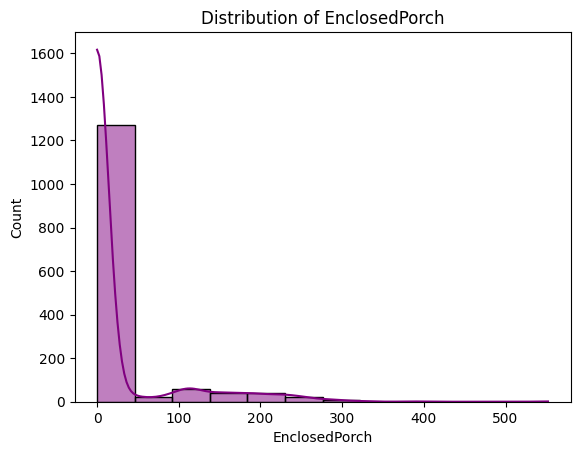

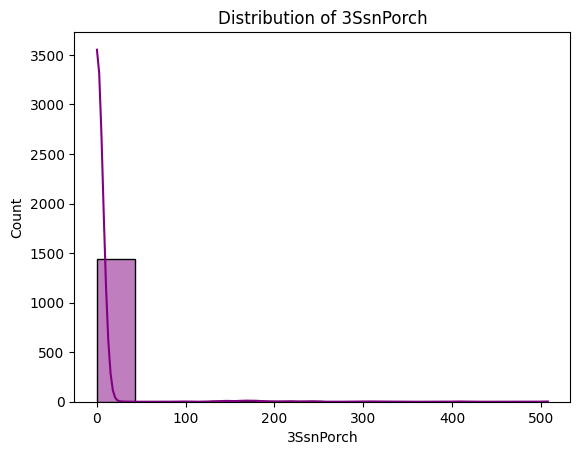

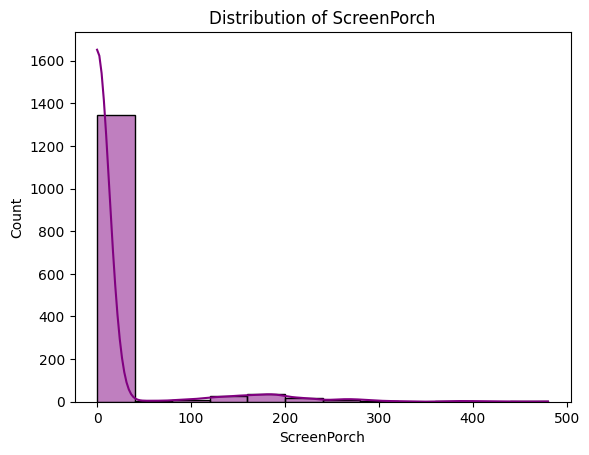

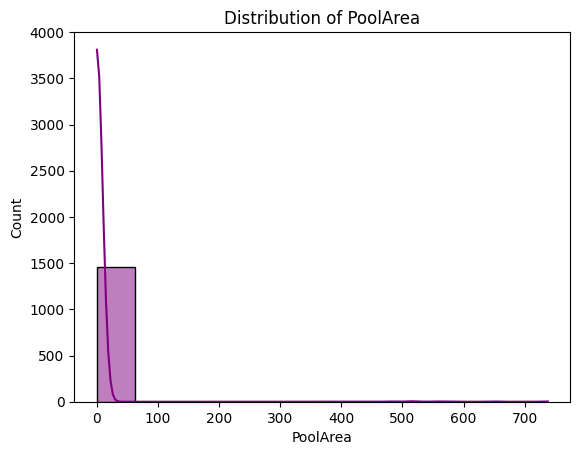

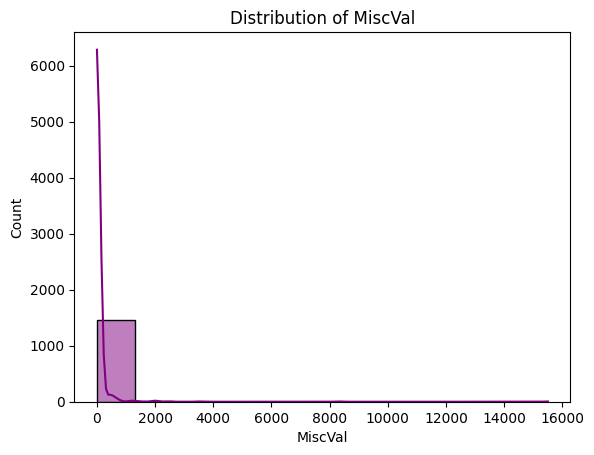

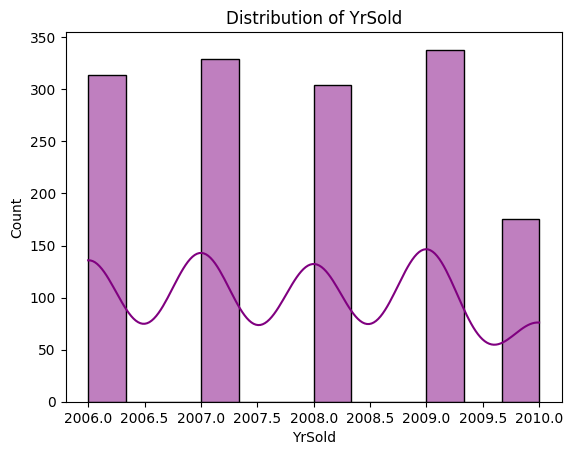

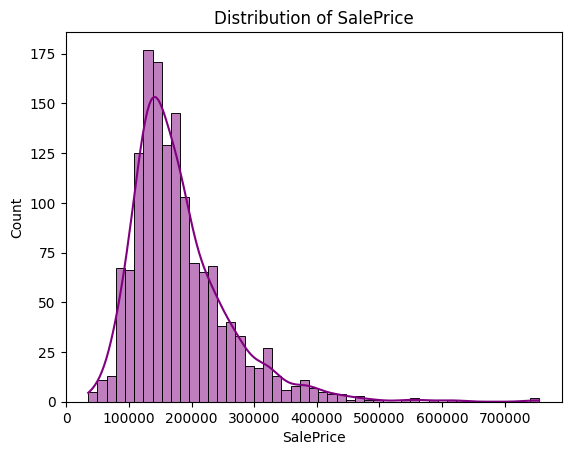

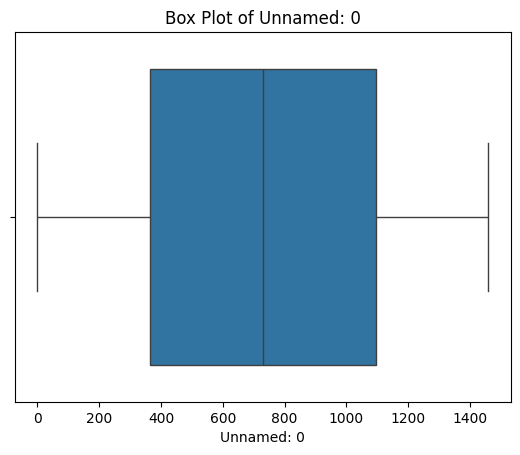

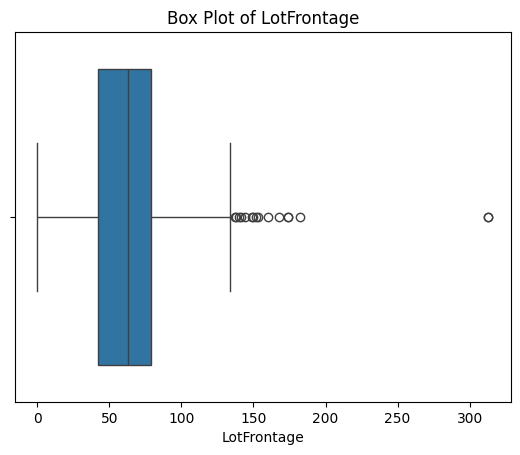

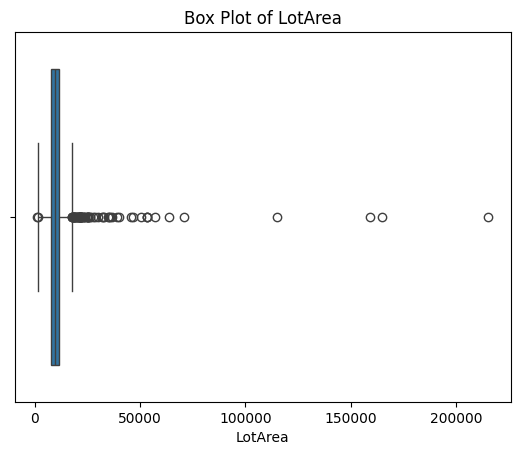

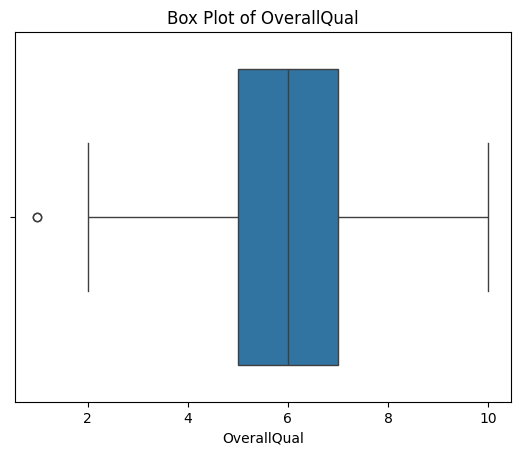

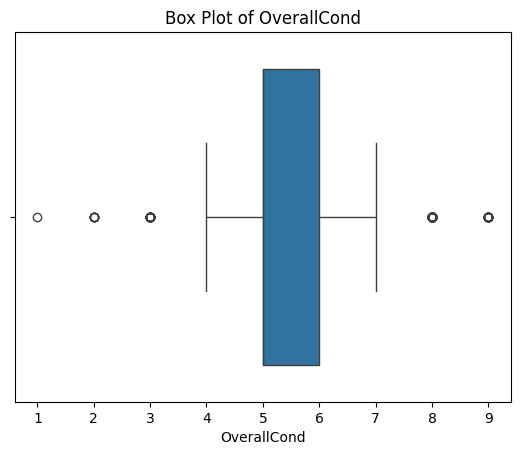

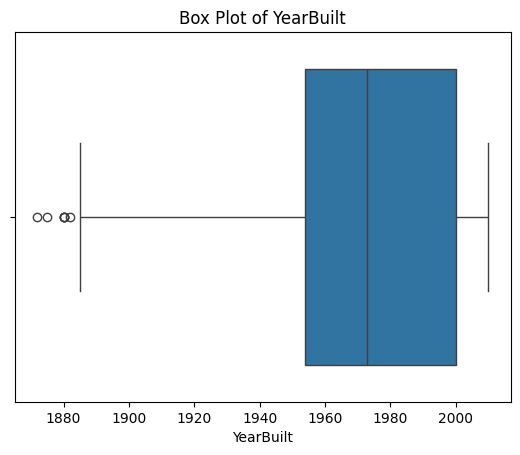

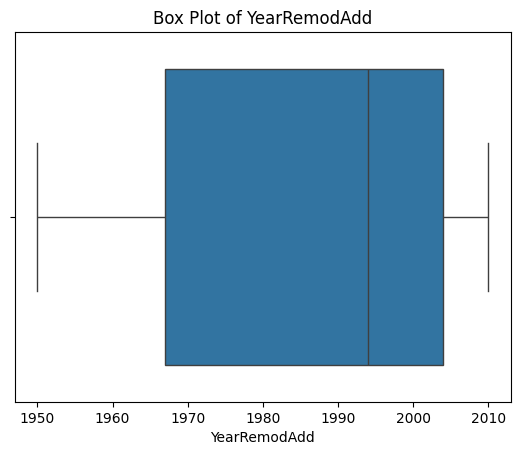

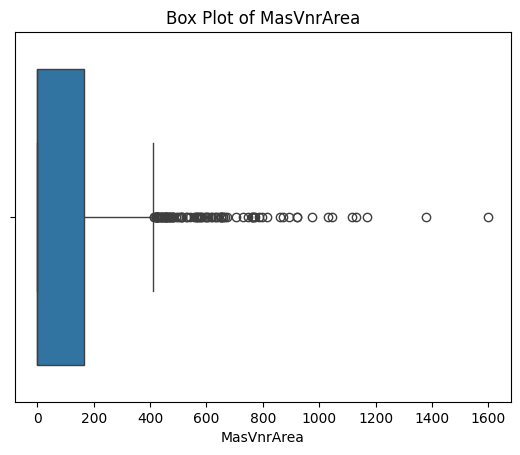

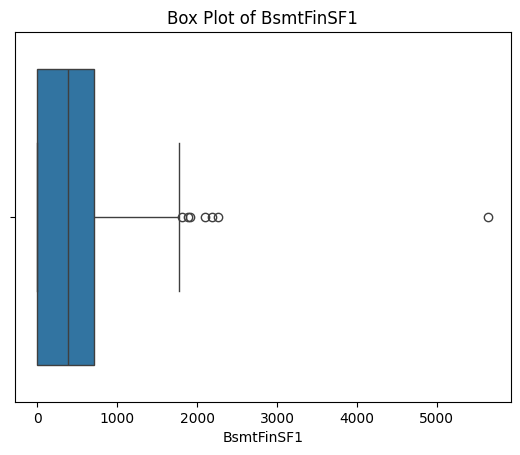

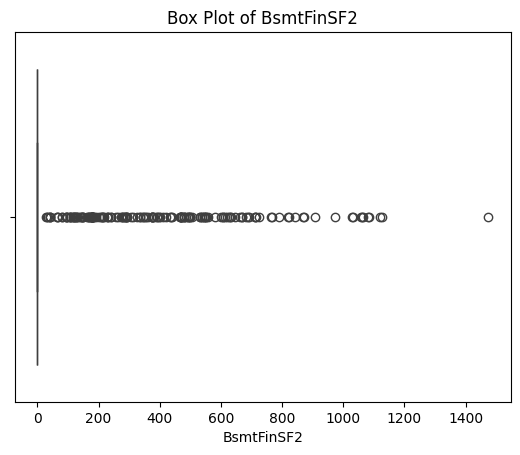

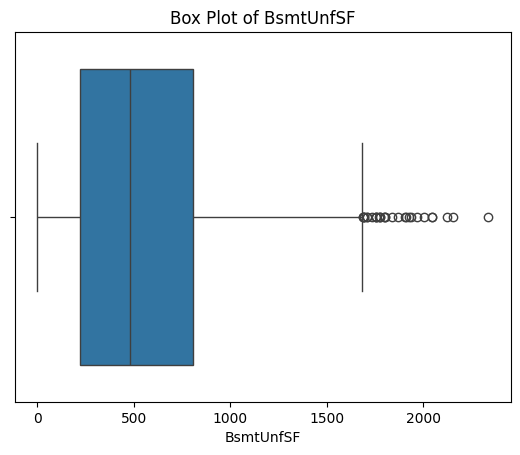

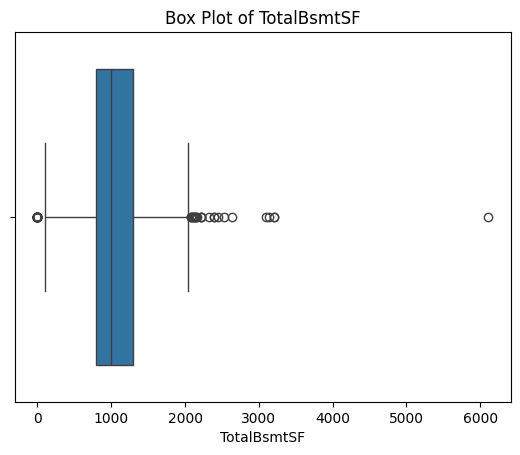

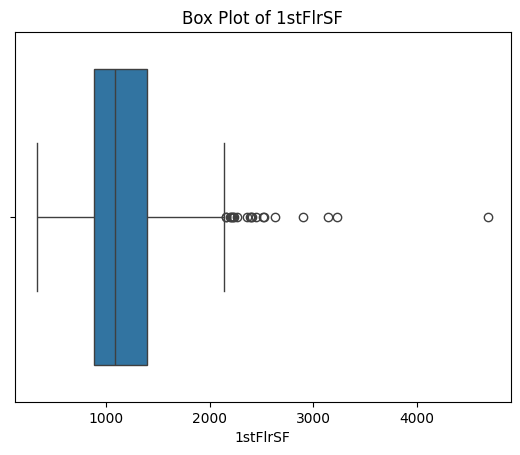

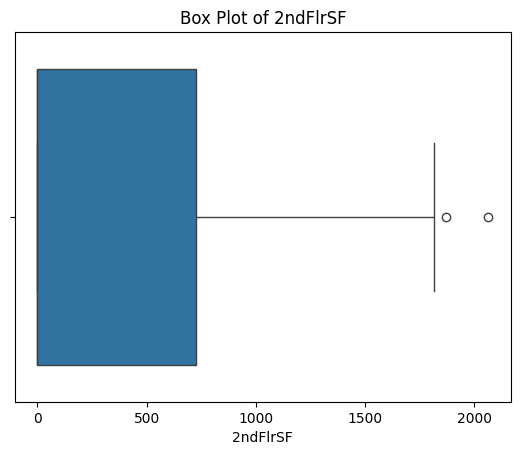

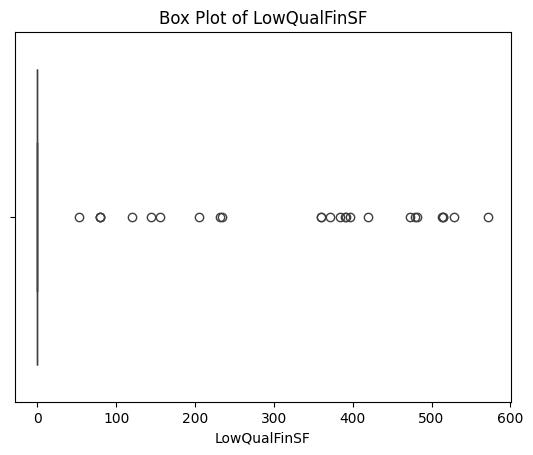

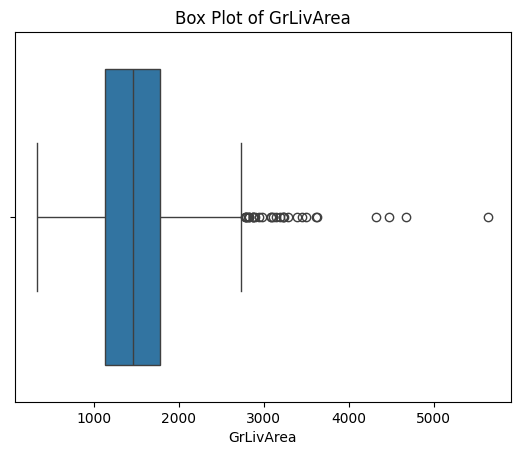

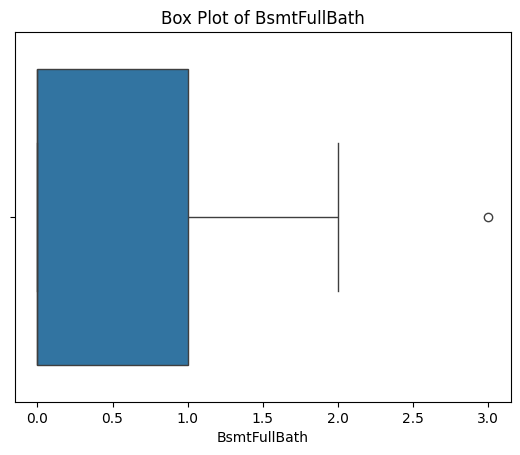

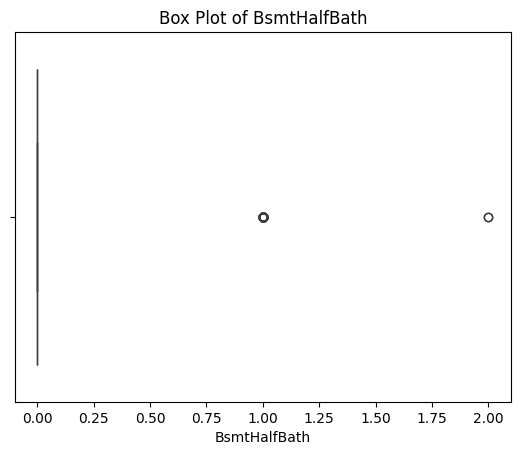

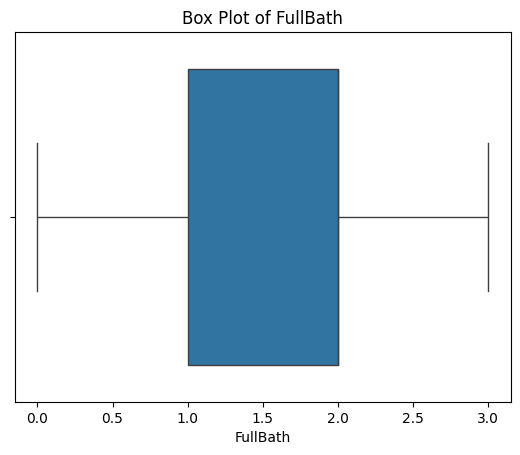

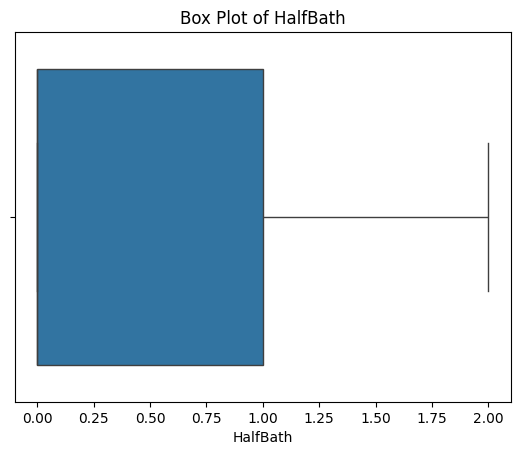

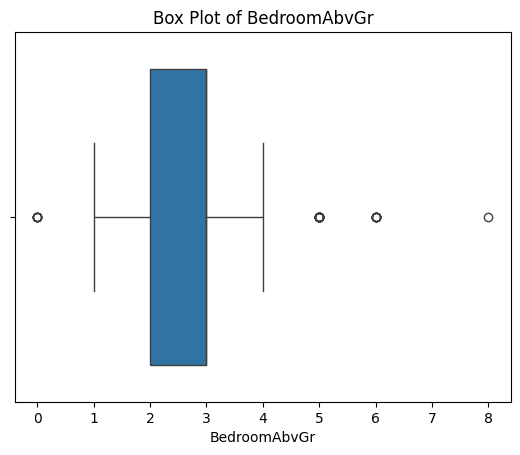

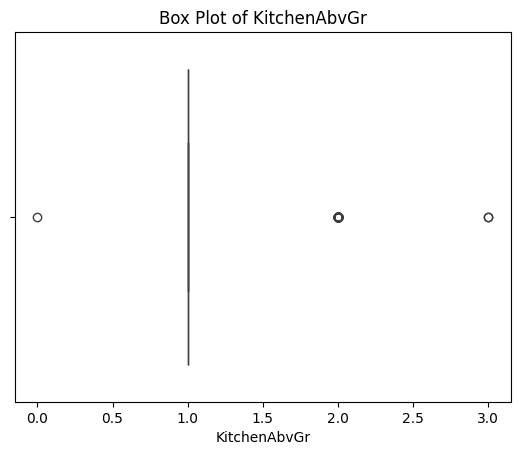

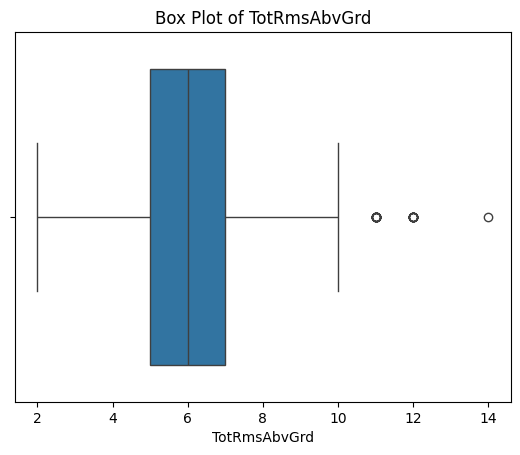

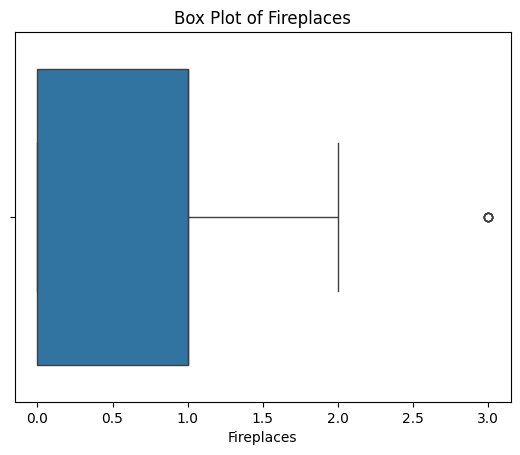

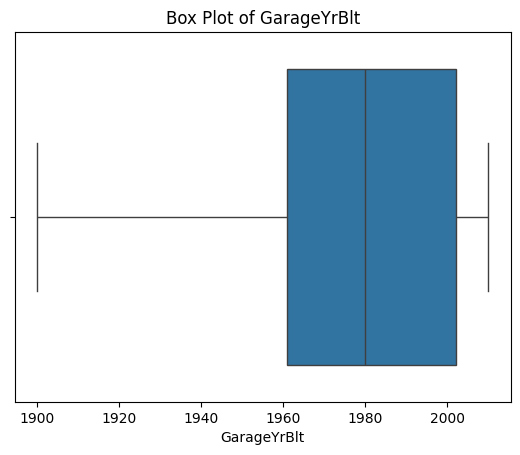

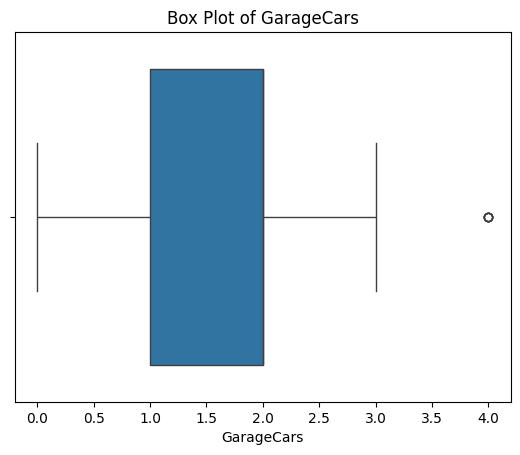

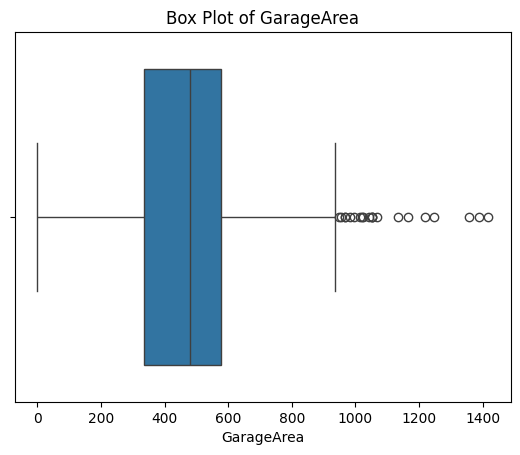

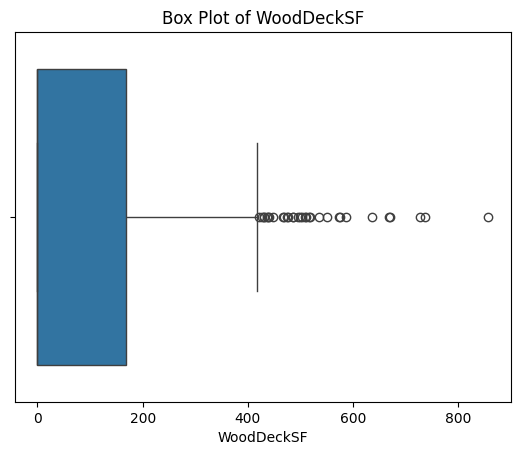

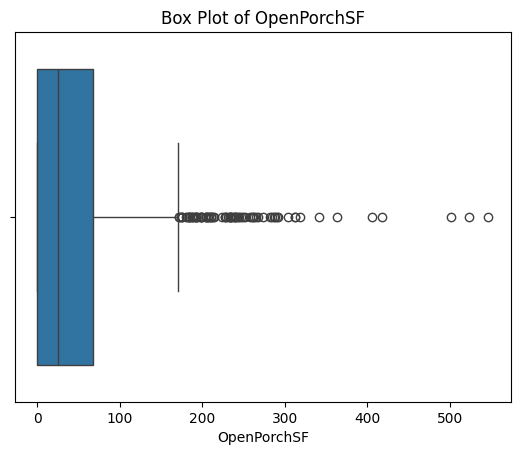

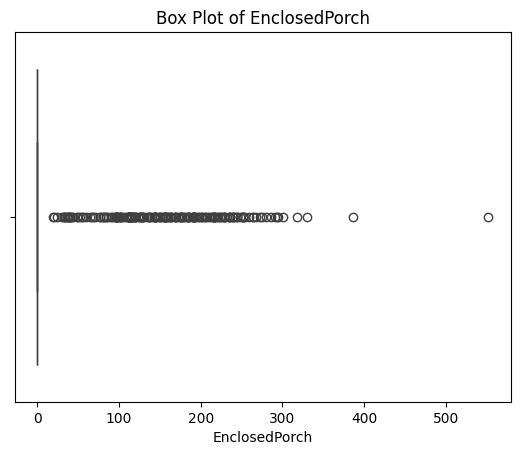

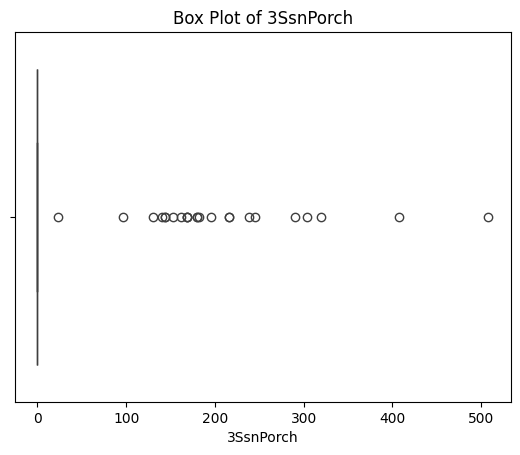

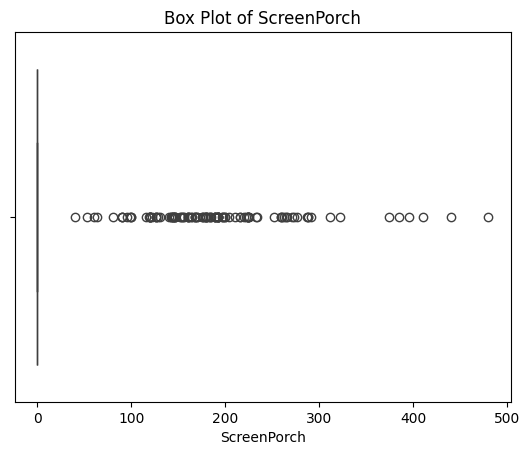

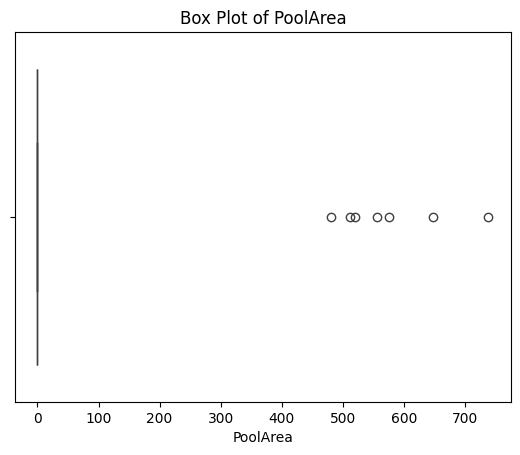

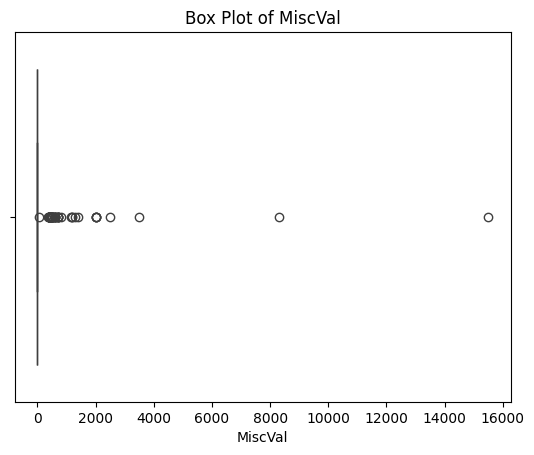

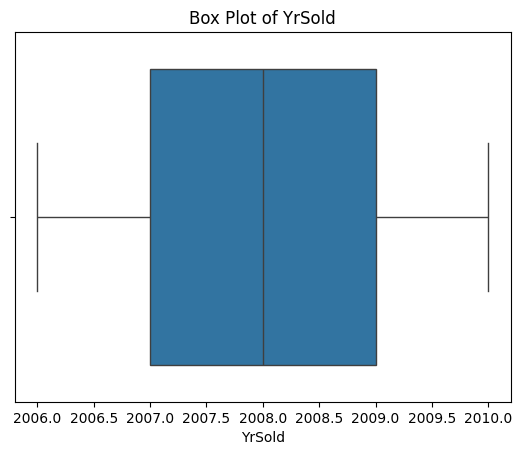

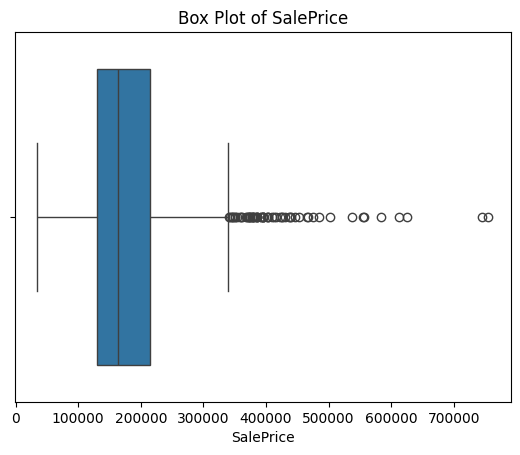

In [ ]:
# Numerical Continuous Variables
num_vars = df.select_dtypes(include='number')
num_feature = num_vars
# Histogram + KDE(Loop)
for feature in num_feature:
    plt.figure()
    sns.histplot(df[feature], kde=True, color='purple')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Box Plot(Loop)
for feature in num_feature:
    plt.figure()
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Histogram with KDE and box plots are used to analyze the distribution in numerical continous variables.

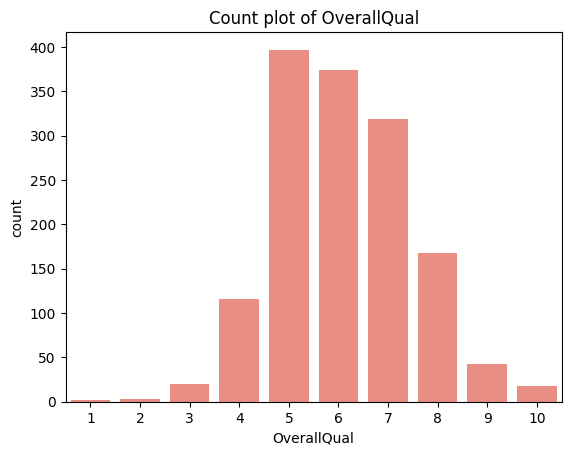

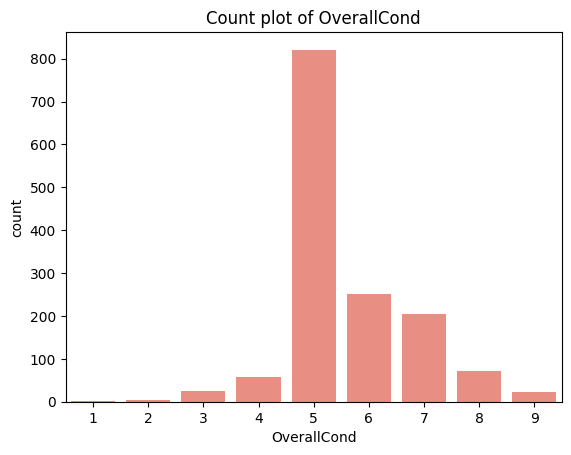

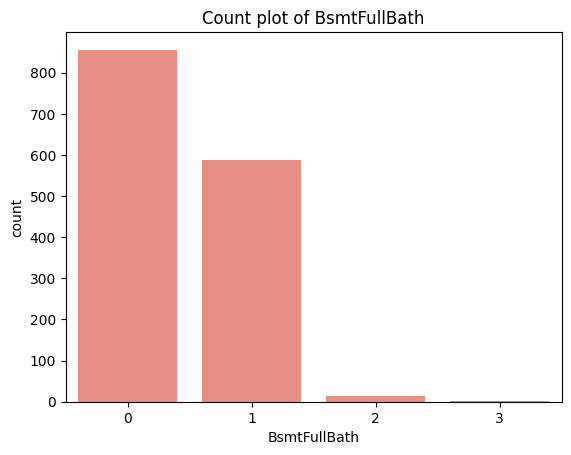

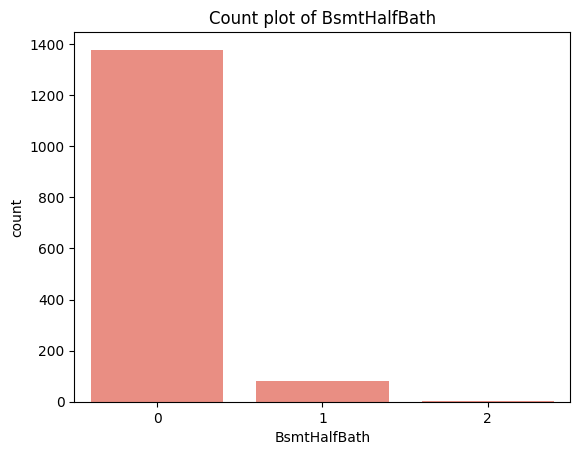

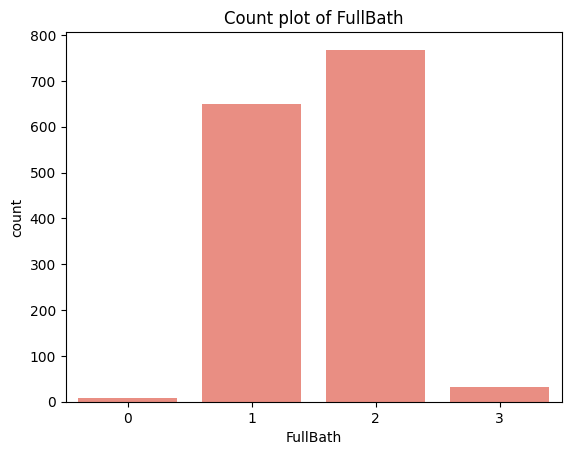

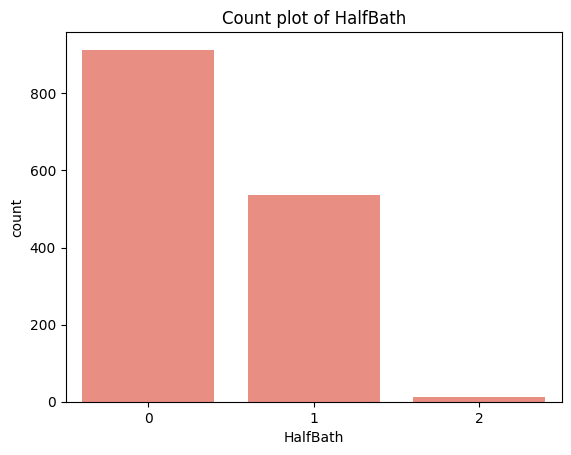

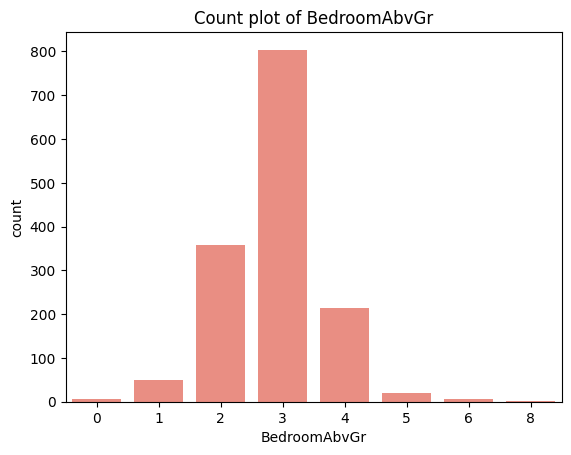

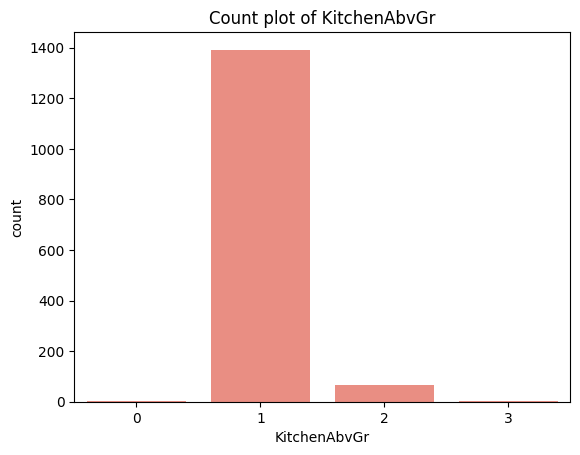

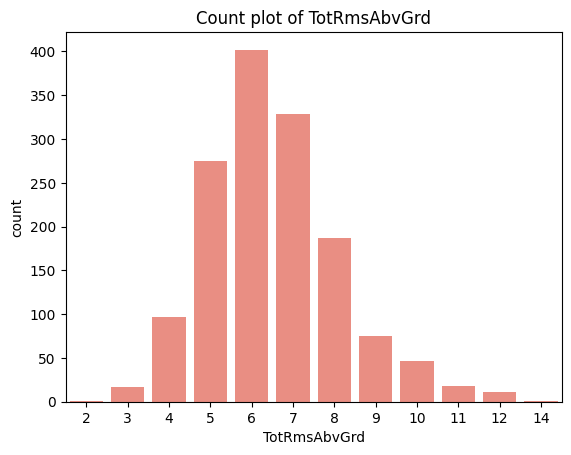

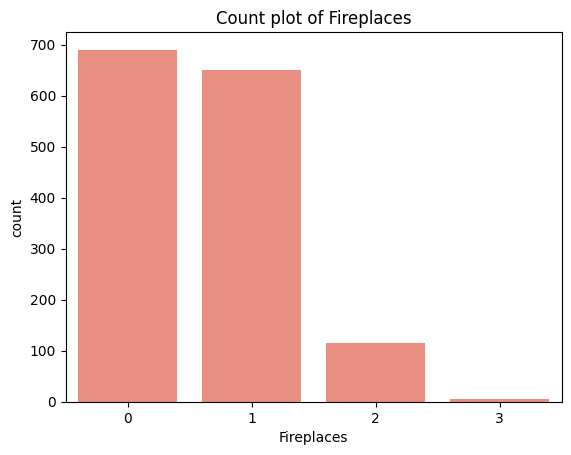

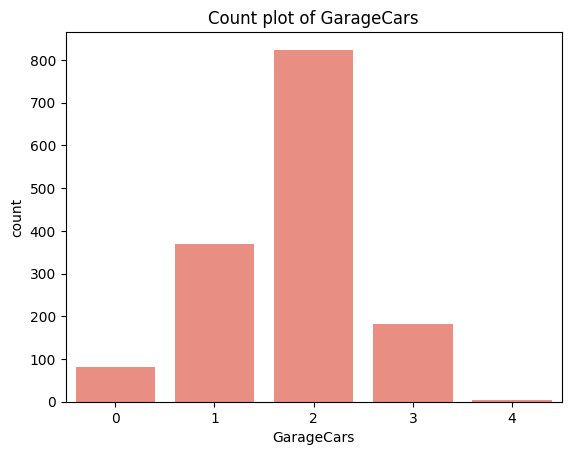

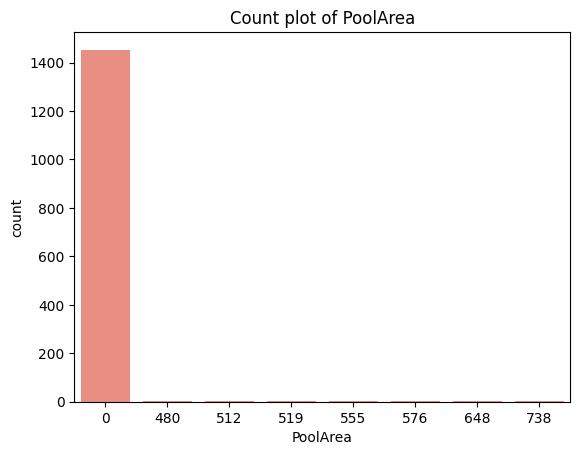

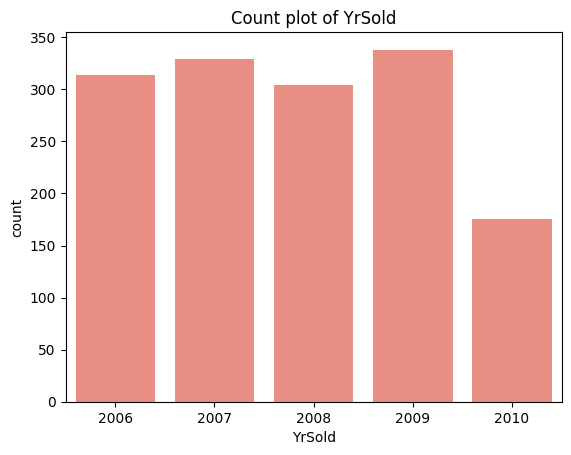

In [ ]:
# Numerical Discrete Variables
discrete_vars = [var for var in num_feature if df[var].nunique() < 15]
for feature in discrete_vars:
    plt.figure()
    sns.countplot(x=df[feature], color='salmon')
    plt.title(f'Count plot of {feature}')
    plt.show()

This analysis visualizes numerical discrete features using count plots to understand their frequency distribution in the dataset.

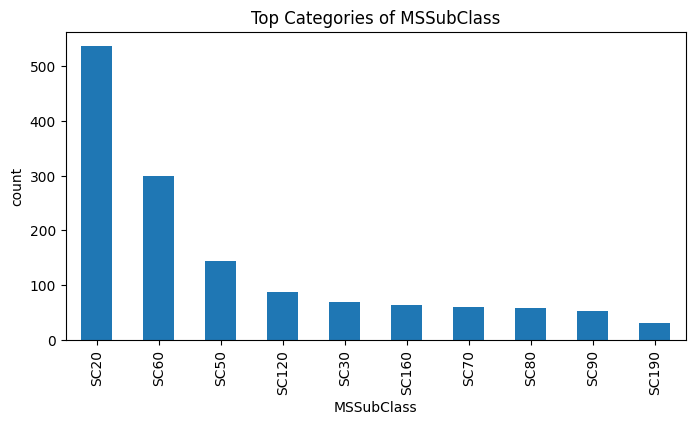

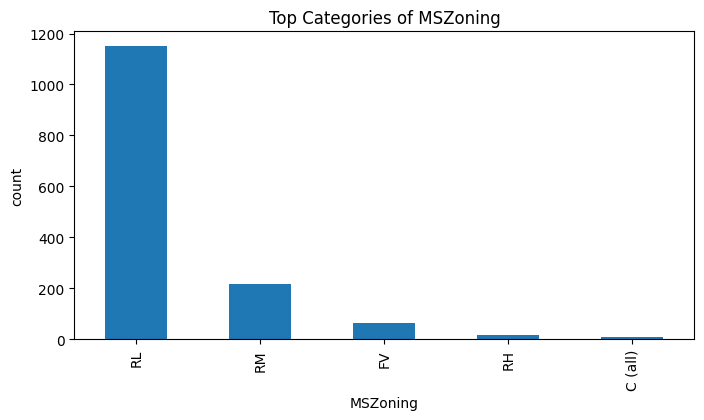

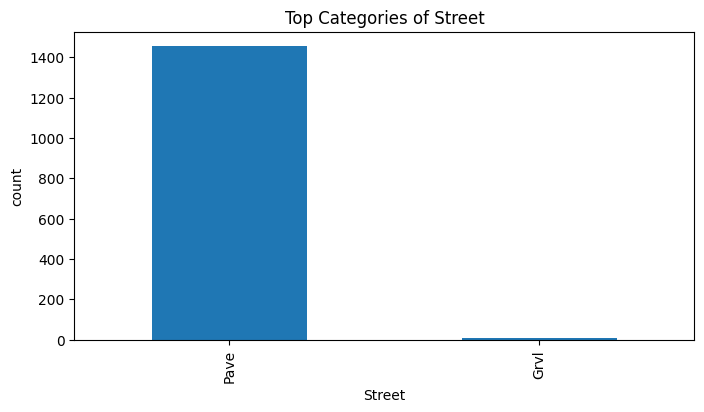

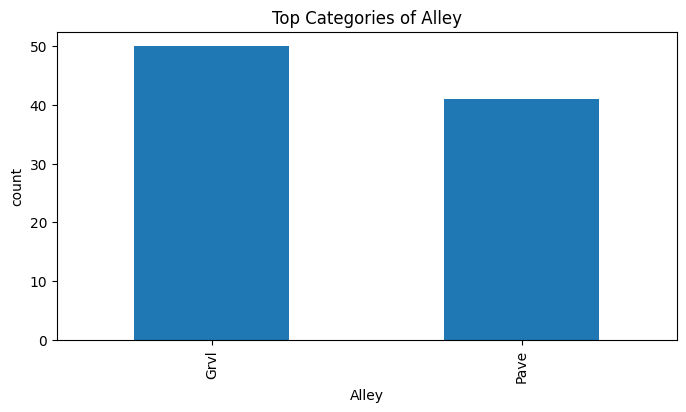

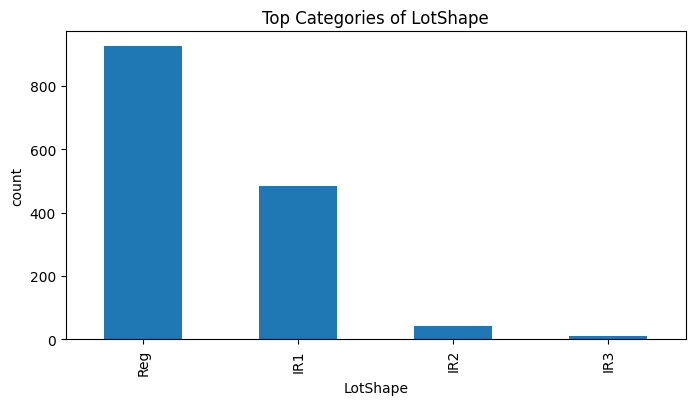

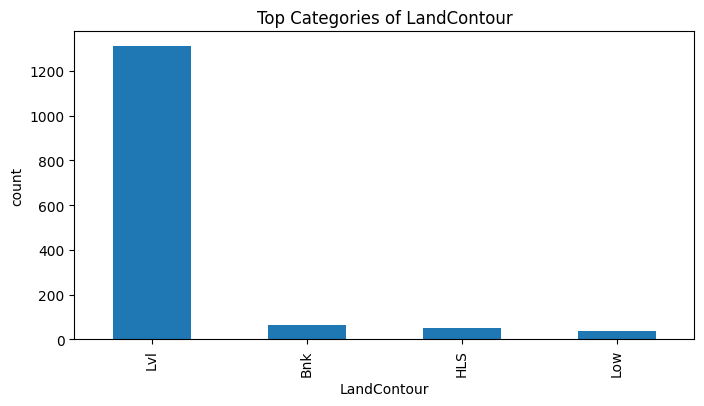

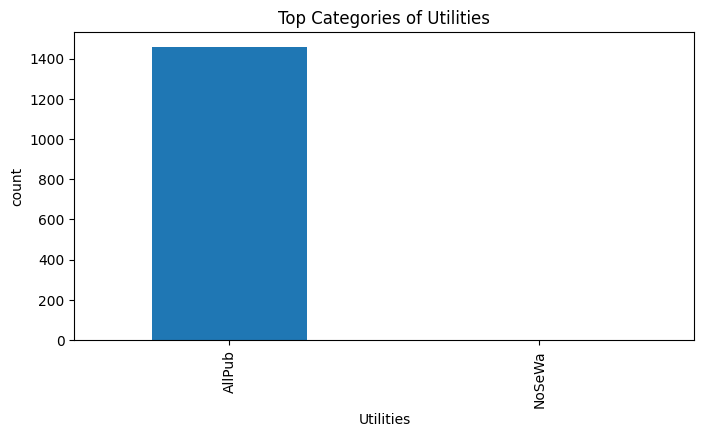

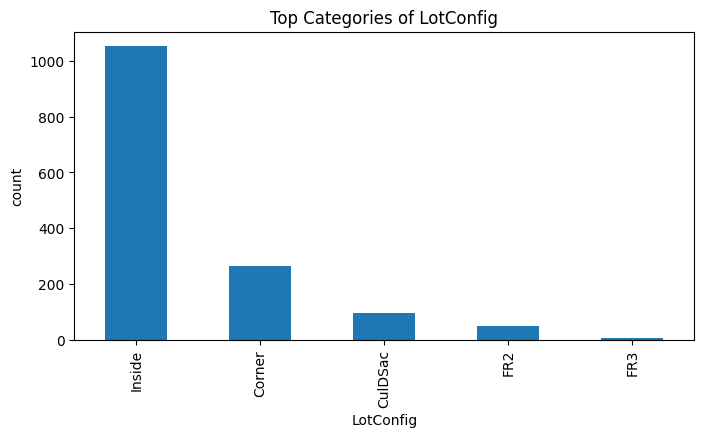

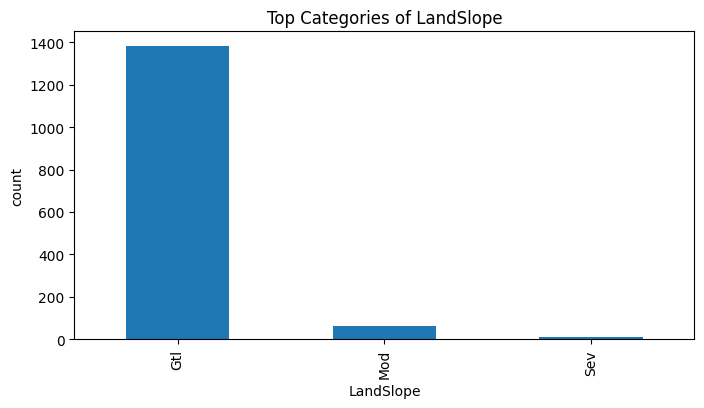

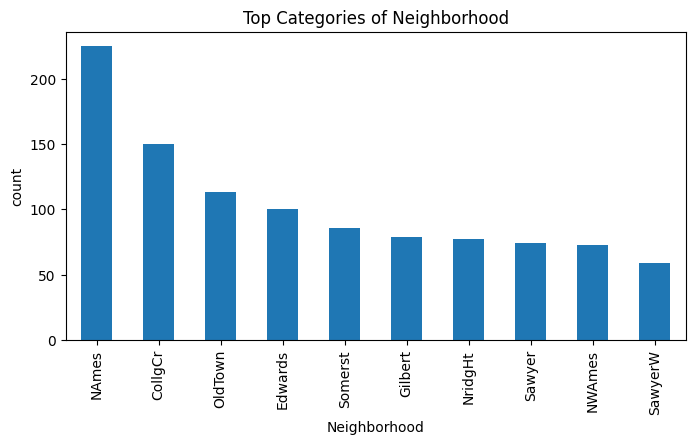

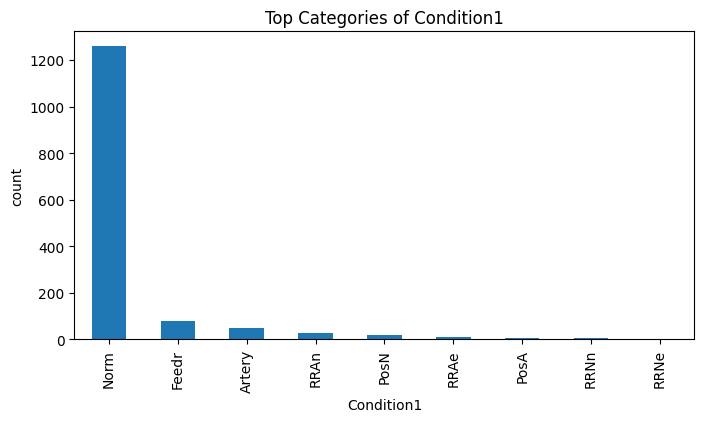

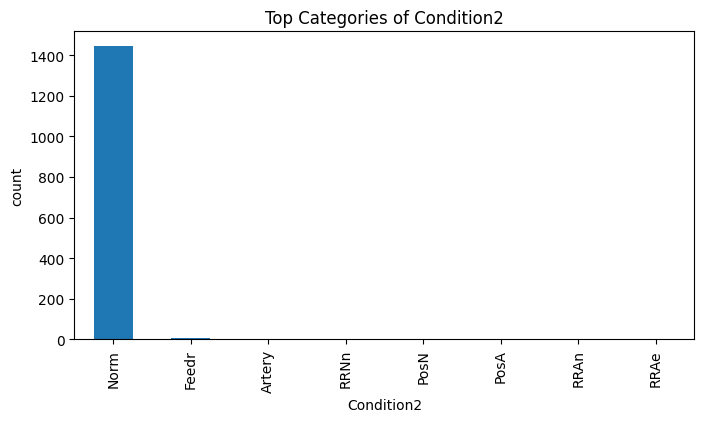

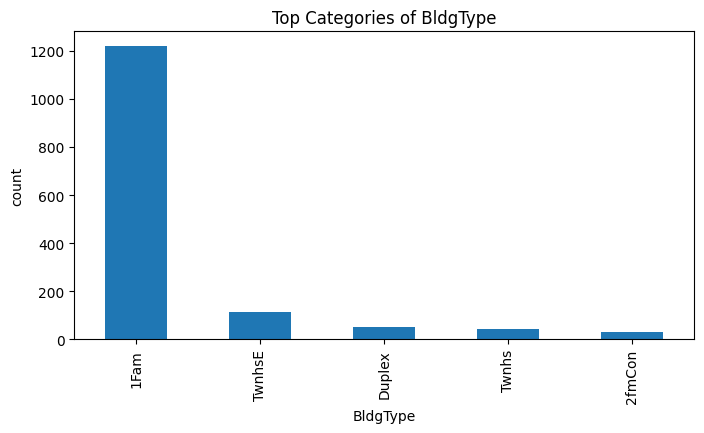

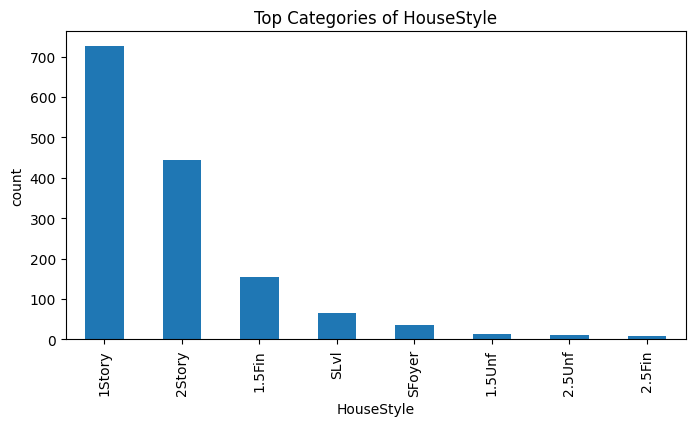

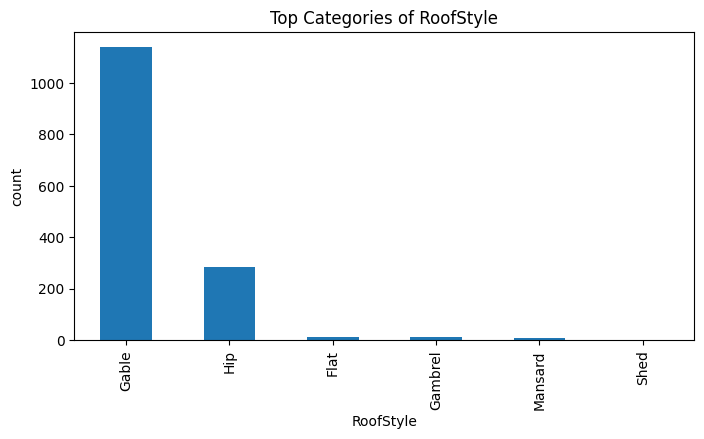

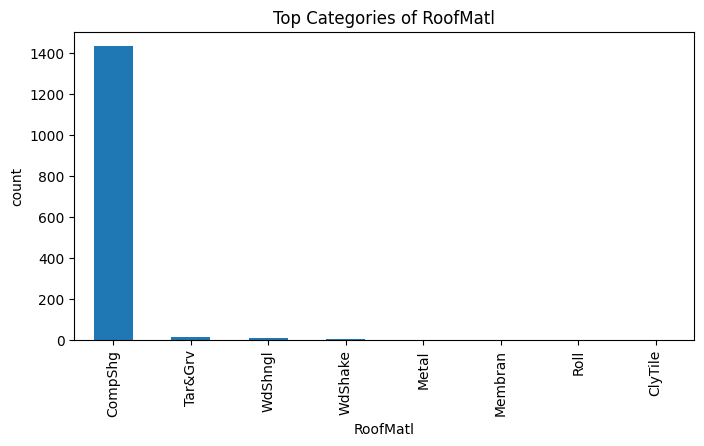

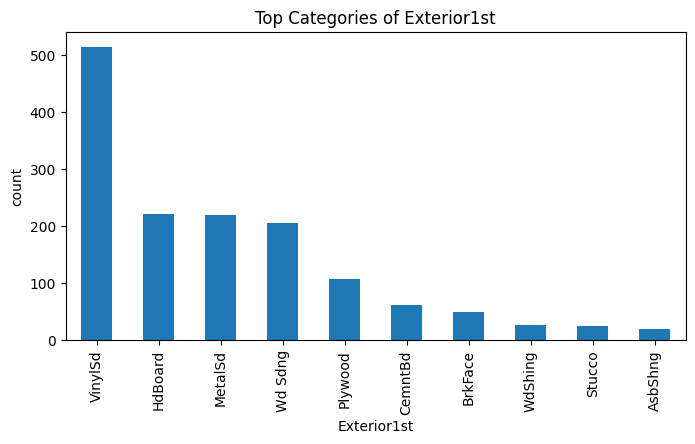

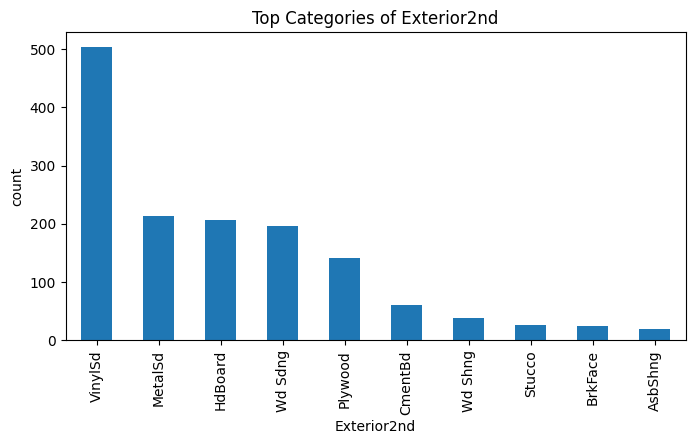

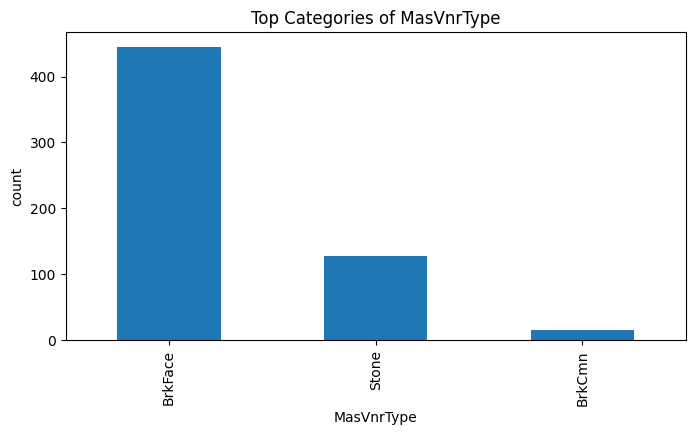

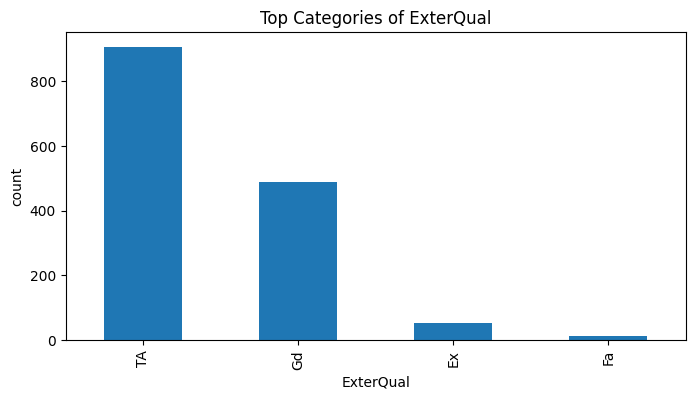

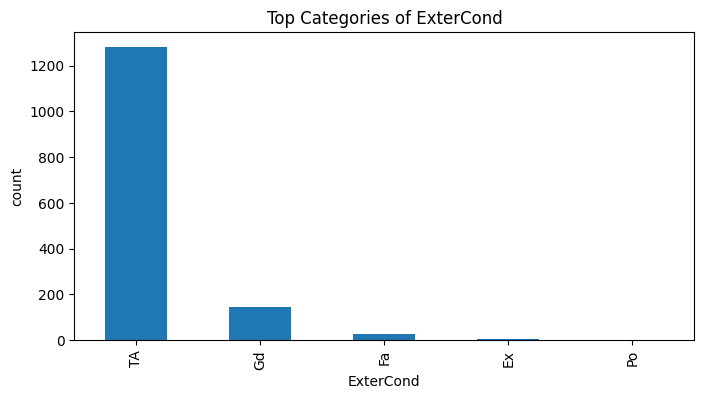

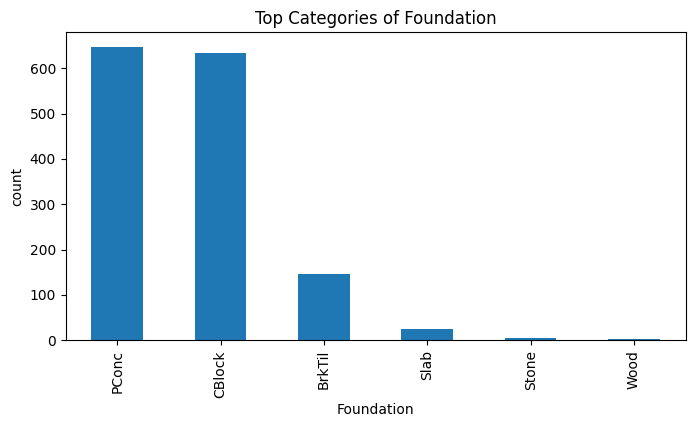

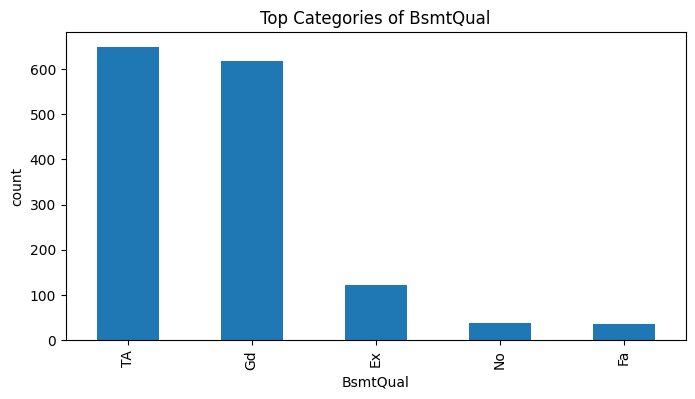

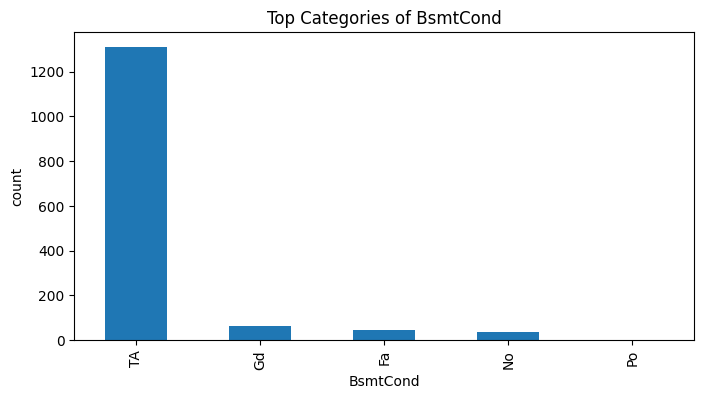

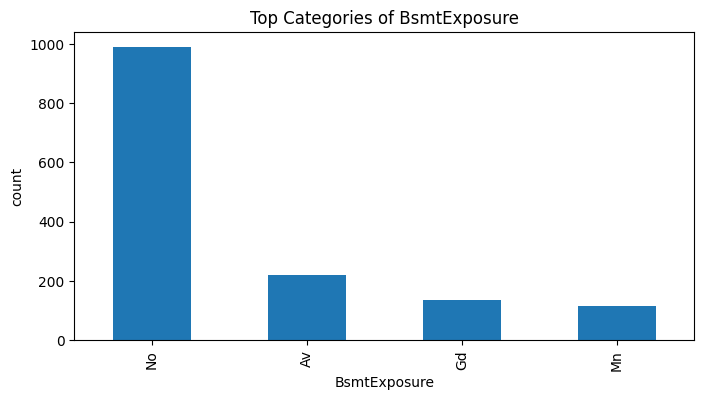

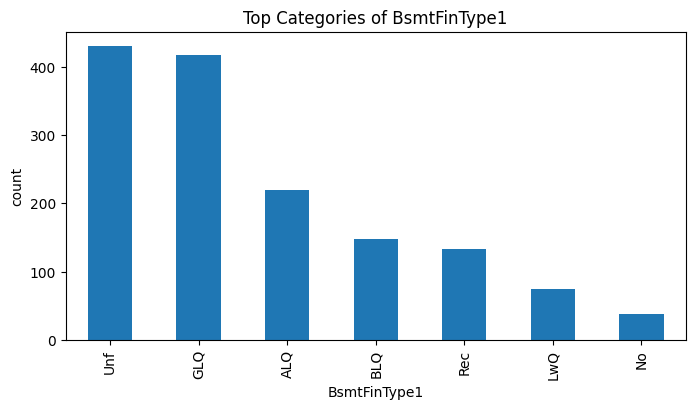

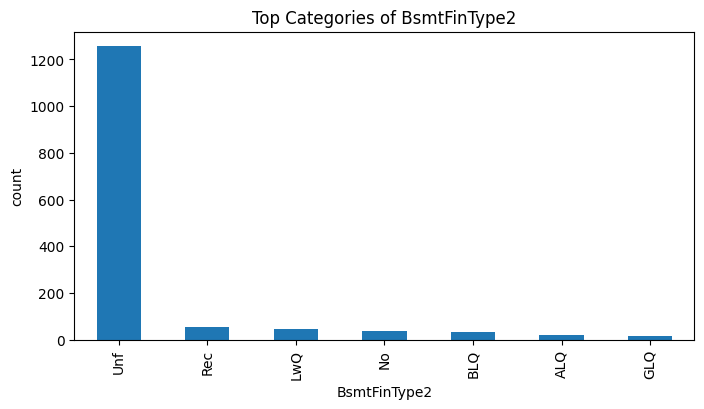

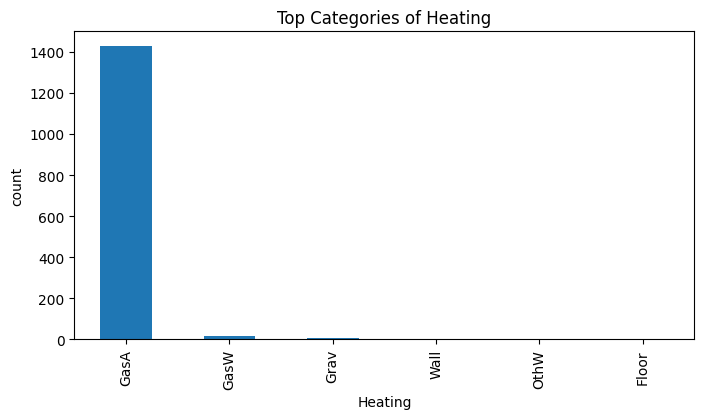

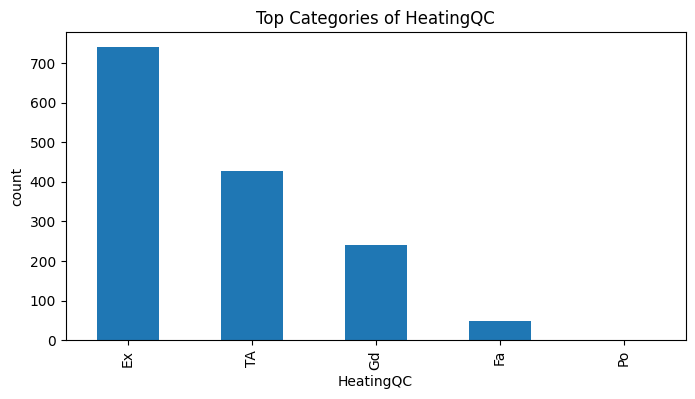

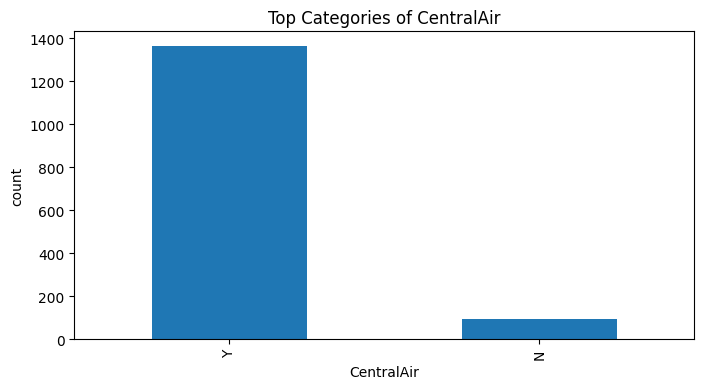

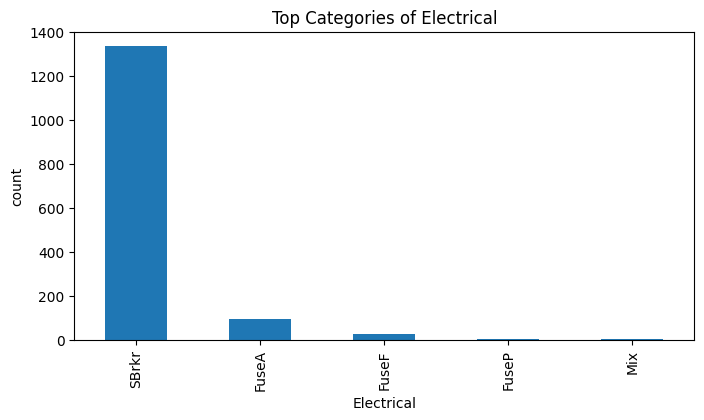

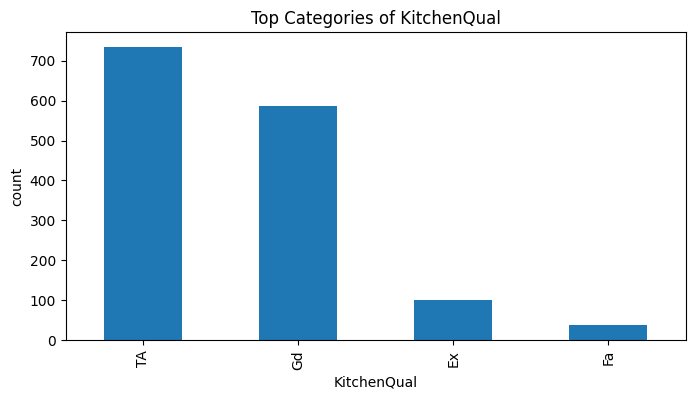

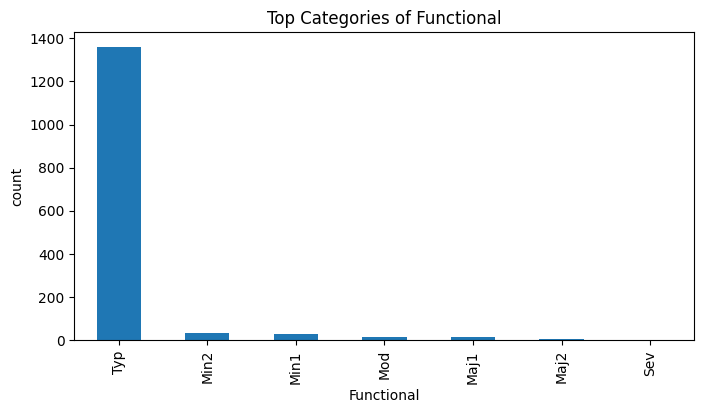

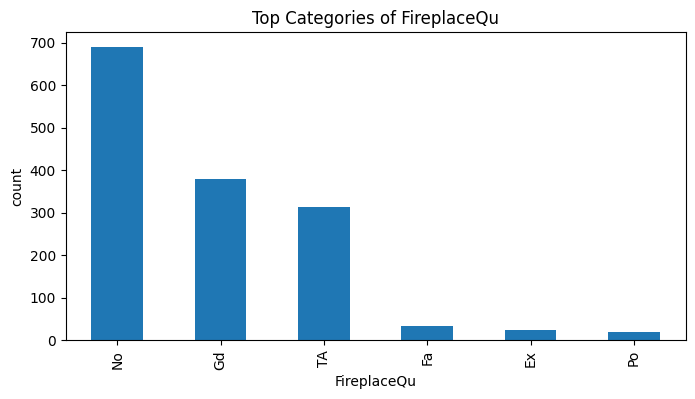

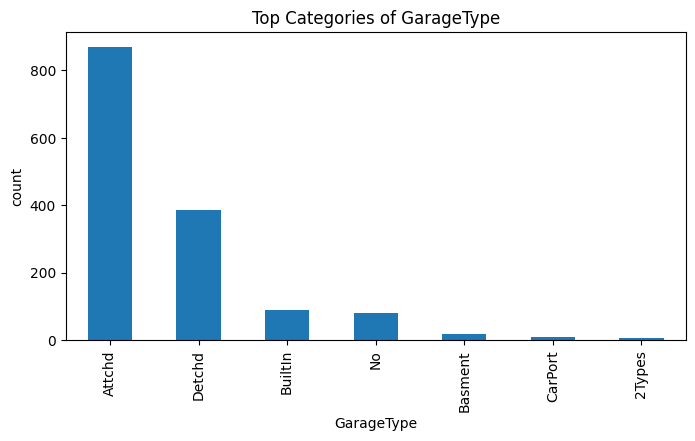

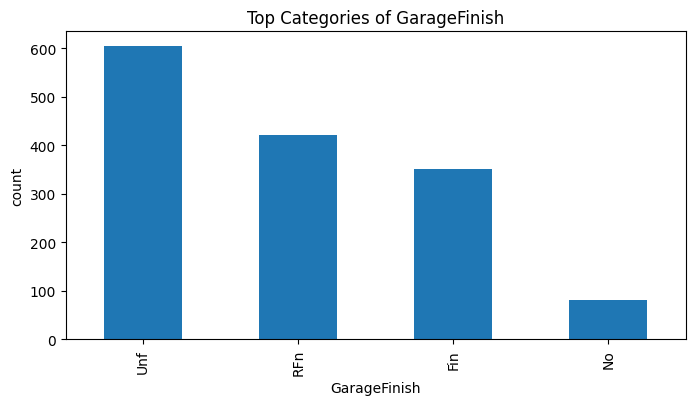

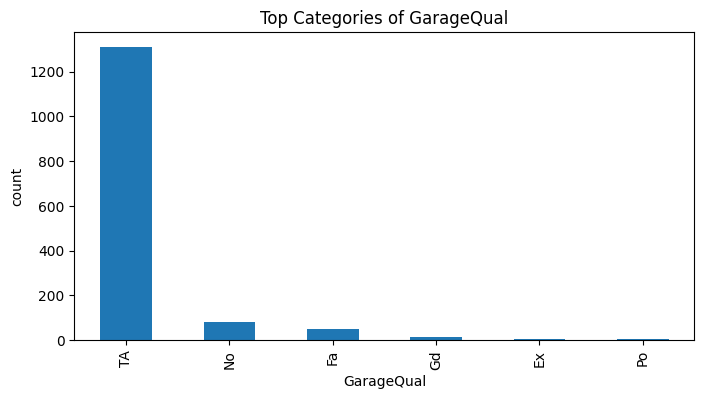

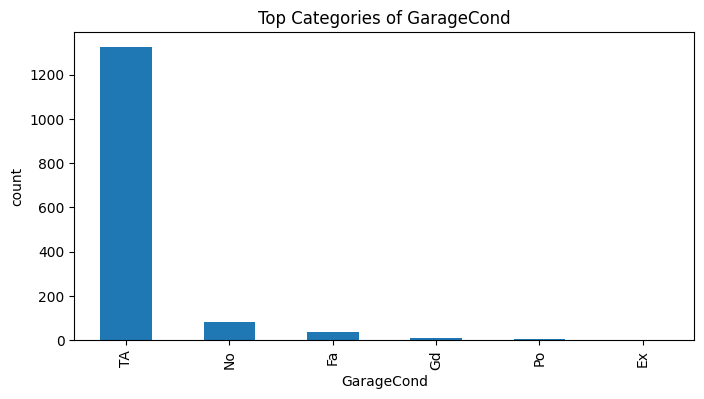

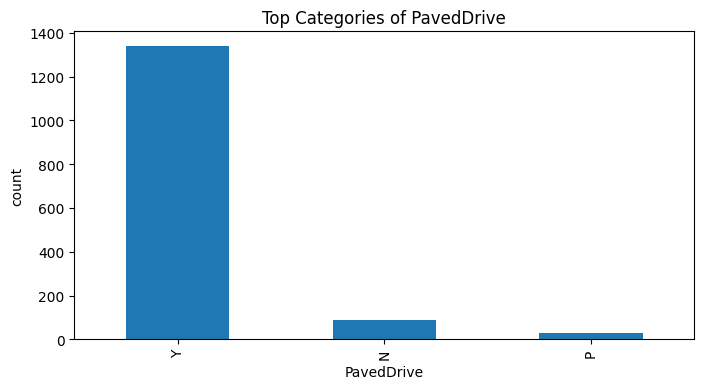

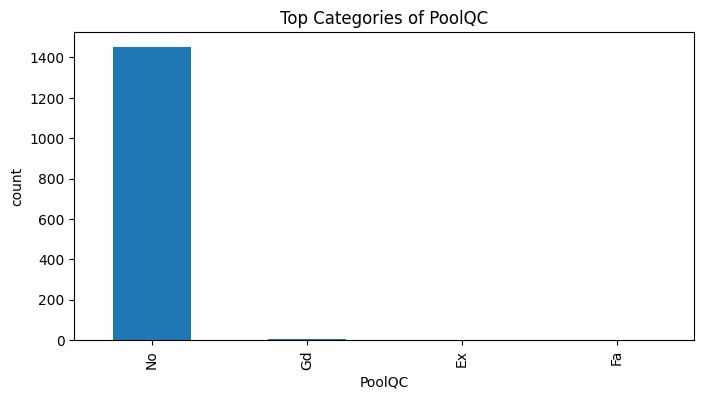

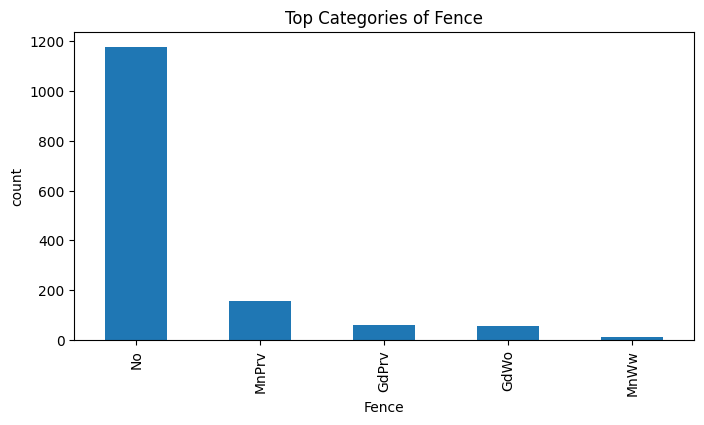

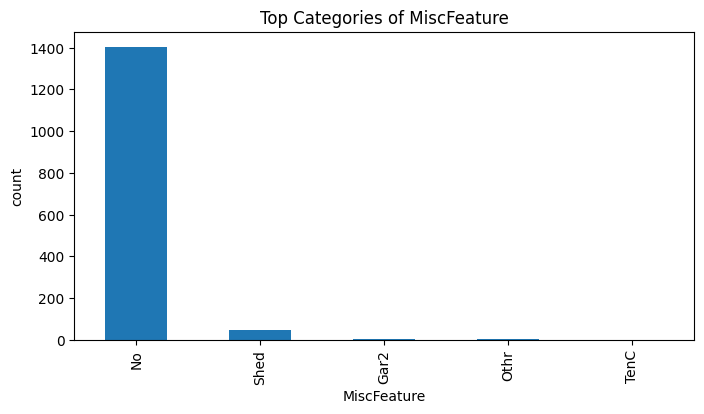

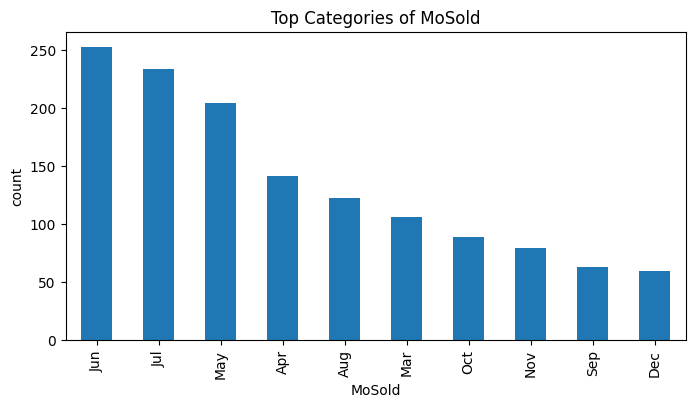

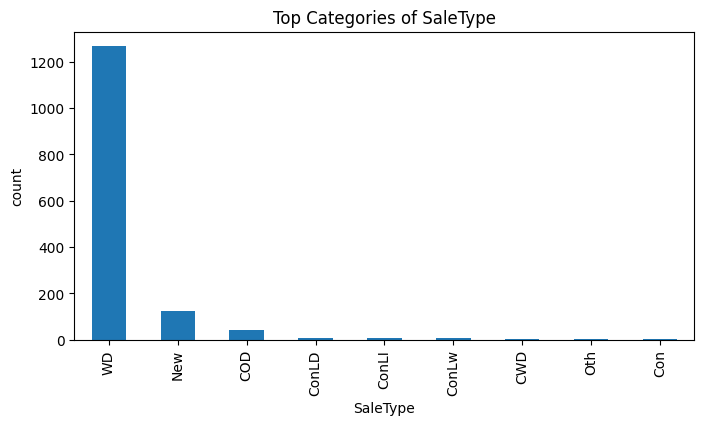

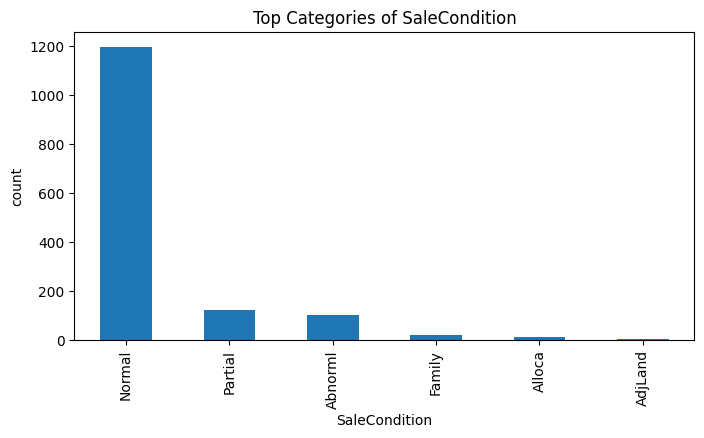

In [ ]:
# Categorical Variables
# Count Plots
cat_vars = df.select_dtypes(include='object').columns
for feature in cat_vars:
    plt.figure(figsize=(8,4))
    df[feature].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top Categories of {feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

# Univariate Analysis:-

1. **Univariate analysis** was performed to understand the individual behavior and distribution of each variable in the dataset.
2. **For Numerical variables,** **histogram with KDE curves and box plots** were used to examine distribution patterns, central tendency, spread, skewness, and the presence of outliers. most numerical features exhibited right skewed distribution, indicating that higher values occur less frequently. several variables contained outliers, which is expected in real estate data due to variability in proper size, area, and pricing.
**Box plots** revealed that some variables had extreme values, particularly for area-related features, reflecting the presence of large or premium houses. These outliers were retained as they represent genuine observations rather than data errors. KDE curves helped in identifying whether the distributions were symmetric, skewed or multi model.
2. **For categorical variables**, **count plots** were used to analyze the frequency distribution of categories. Many categorical features showed dominance of a few categories,while others had multiple levels with lower frequencies. To improve readability,only the top categories were visualized where applicable.This analysis helped identify the most common property characteristics and design attributes.
1.   The observed skewness and outliers reflect natural variation in real world housing data rather than data quality issues.
2.   No outliers were removed and no tansformations were applied, as the objective of this analysis is exploratory.
Overall univariate analysis provided valuable insights into data distribution, variability, skewness, and category dominance. these findings support informed decisions for further analysis and modeling.















# Bivariate Analysis:-

In [ ]:
# Numerical vs Sale Price(Scatter plus correlation)

num_cols = df.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()['SalePrice'].sort_values(ascending=False)

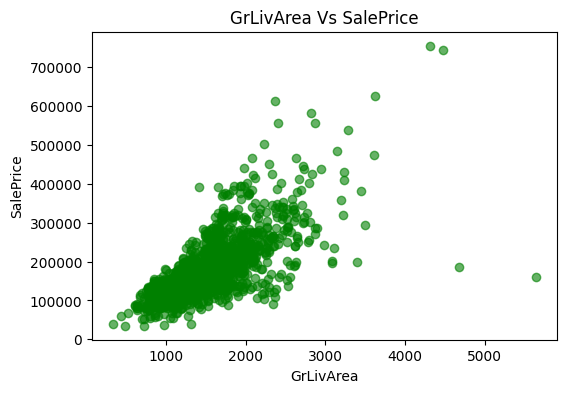

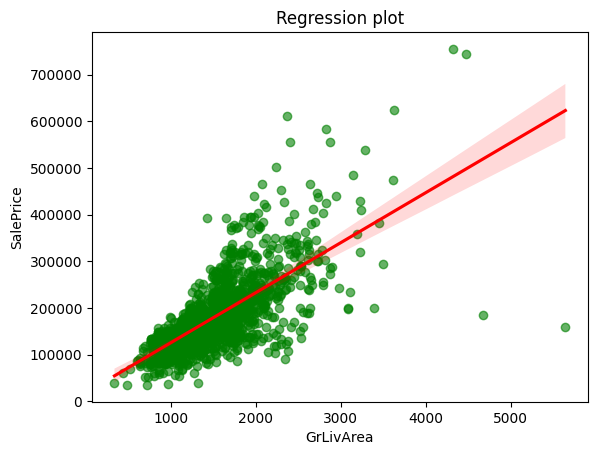

In [ ]:
# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df['GrLivArea'], df['SalePrice'], color='green', alpha=0.6)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea Vs SalePrice')
plt.show()

# Regression Plot

sns.regplot(x='GrLivArea', y='SalePrice', data=df,
            scatter_kws={'color': 'green', 'alpha': 0.6},
            line_kws={'color': 'red'})

plt.title('Regression plot')
plt.show()

This analysis uses scatter and regression plots along with correlation to study the relationship between numerical features and house sale price.

# Categorical vs SalePrice:-

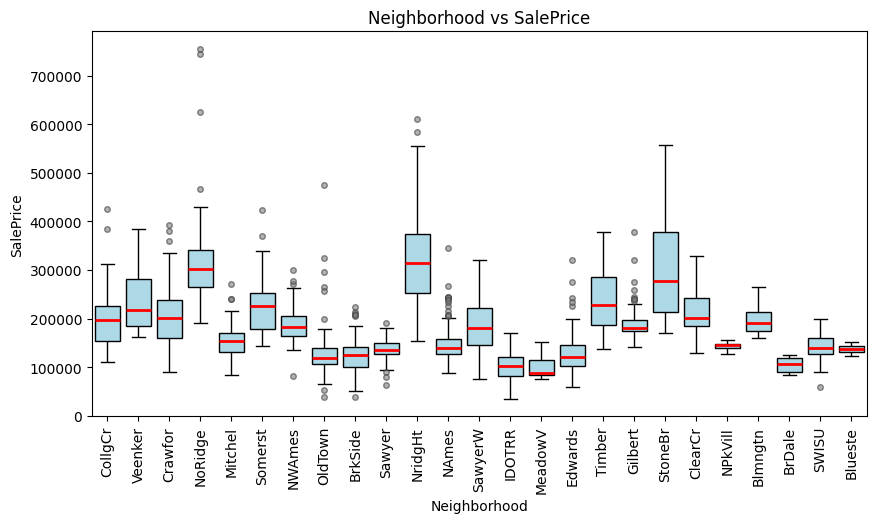

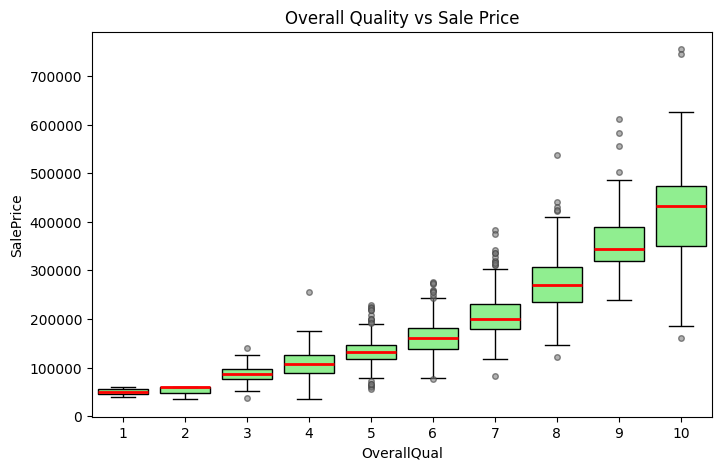

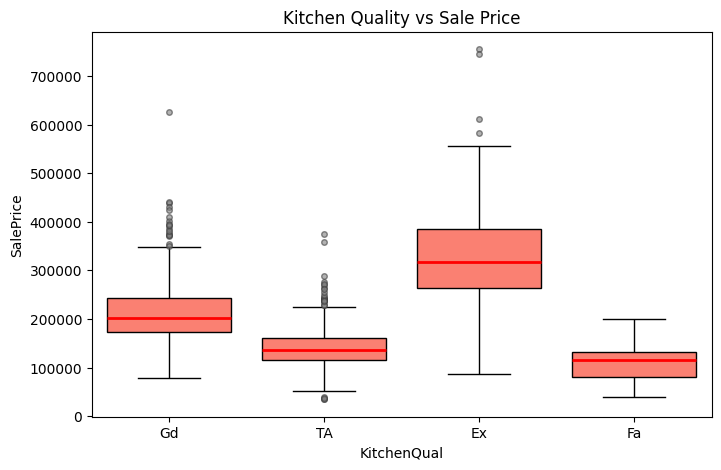

In [ ]:
# Neighborhood vs Sale Price  (Box Plot)

plt.figure(figsize=(10,5))
sns.boxplot(
    x='Neighborhood',
    y='SalePrice',
    data=df,
    boxprops=dict(facecolor='lightblue', edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='grey', markersize=4, alpha=0.6)
)

plt.xticks(rotation=90)
plt.title('Neighborhood vs SalePrice')
plt.show()

# Overall quality vs sale price

plt.figure(figsize=(8,5))

sns.boxplot(
    x='OverallQual',
    y='SalePrice',
    data=df,
    boxprops=dict(facecolor='lightgreen', edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='grey', markersize=4, alpha=0.6)
)

plt.title('Overall Quality vs Sale Price')
plt.show()

# Kitchen Quality vs Sale Price

plt.figure(figsize=(8,5))

sns.boxplot(
    x='KitchenQual',
    y='SalePrice',
    data=df,
    boxprops=dict(facecolor='salmon', edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='grey', markersize=4, alpha=0.6)
)

plt.title('Kitchen Quality vs Sale Price')
plt.show()



Box plots are used to analyze how categorical variables such as neighborhood and quality features impact the house sale price.

**Outliers Detection and Treatment:-**

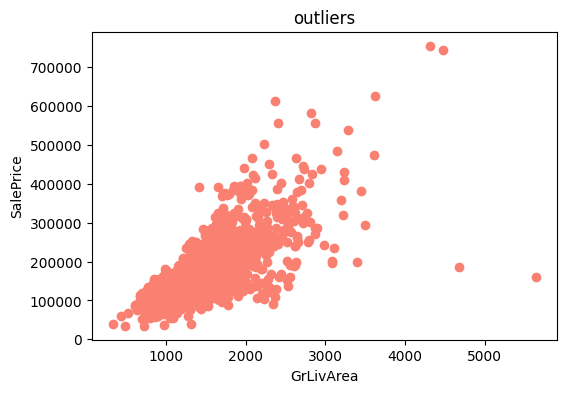

In [ ]:

# Scatter plot to visually identify outliers

plt.figure(figsize=(6,4))
plt.scatter(df['GrLivArea'], df['SalePrice'], color='salmon')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('outliers')
plt.show()

In [ ]:
# Identify outliers using IQR method

Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3-Q1

grliv_outliers = df[
     (df['GrLivArea'] < (Q1 - 1.5 * IQR))  |
     (df['GrLivArea'] > (Q3 + 1.5 * IQR))
]

grliv_outliers[['GrLivArea', 'SalePrice']]


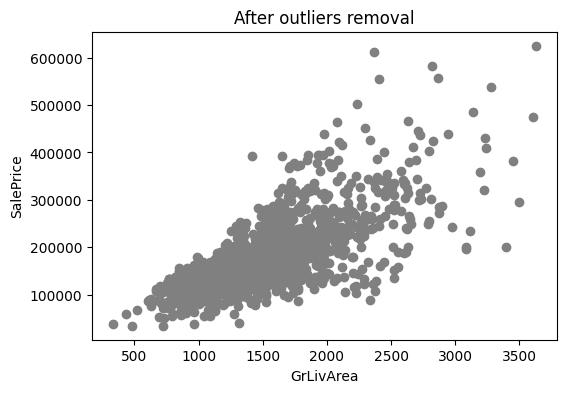

In [ ]:
# Remove only extreme GrlivArea
df = df[df['GrLivArea'] < 4000]

# Verifying After Removal
plt.figure(figsize=(6,4))
plt.scatter(df['GrLivArea'], df['SalePrice'], color='grey')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('After outliers removal')
plt.show()

# Outliers:-
Outliers were identified using the IQR method. while several numerical variables exhibited outliers, only extreme values of GrLivArea were treated, as they significantly deviated from the overall price trend. other outliers were retained since they represent valid housing characteristics. Previously identified outliers are visually examined to assess their influence on the relationship between variables.

# Bivariate Analysis- Joint Distribution:-

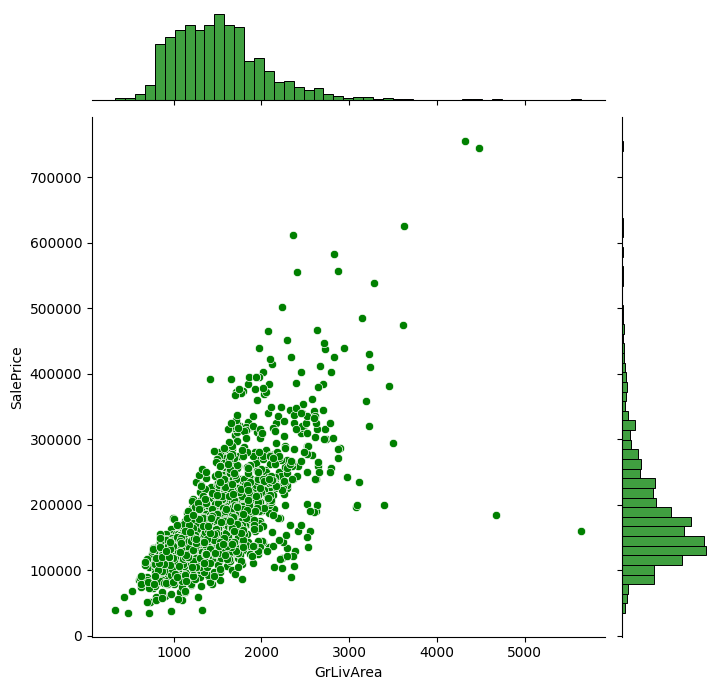

In [ ]:
sns.jointplot(
    x='GrLivArea',
    y='SalePrice',
    data=df,
    kind='scatter', color = 'green',
    height=7
)
plt.show()

The joint plot between GrLivArea and SalePrice shows a strong positive relationship between living area and house price. The central scatter plot indicates that houses with larger living areas tend to have higher sale price. The marginal distributions show that both variables are right skewed, which is typical for housing data. This plot confirms the findings observed in earlier bivariate analysis.

# Multivariate Analysis:-

In [ ]:
# multi variante Analysis:-
# Selecting Relevant Numerical Features:-
numerical_features = [
    'SalePrice',
    'GrLivArea',
    'TotalBsmtSF',
    'OverallQual',
    'GarageArea'
]
df_num = df[numerical_features]

In [ ]:
# Correlation Matrix
corr_matrix = df_num.corr()
corr_matrix

SalePrice  GrLivArea  TotalBsmtSF  OverallQual  GarageArea
SalePrice     1.000000   0.708624     0.613581     0.790982    0.623431
GrLivArea     0.708624   1.000000     0.454868     0.593007    0.468997
TotalBsmtSF   0.613581   0.454868     1.000000     0.537808    0.486665
OverallQual   0.790982   0.593007     0.537808     1.000000    0.562022
GarageArea    0.623431   0.468997     0.486665     0.562022    1.000000

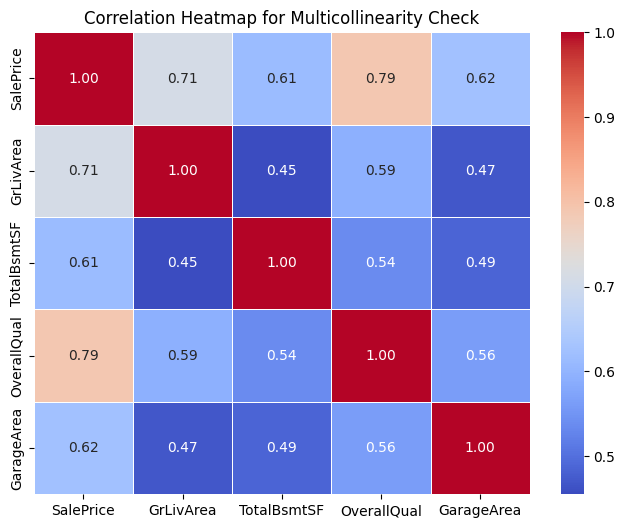

In [ ]:
# checking for multicollinearity
# Correlation Heatmap
corr_matrix = df_num.corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap for Multicollinearity Check")
plt.show()

The correlation heatmap shows that while some independent variables are moderately correlated, none of the correlations exceed the critical threshold. This indicates the absence of severe multicollinearity among the selected features.

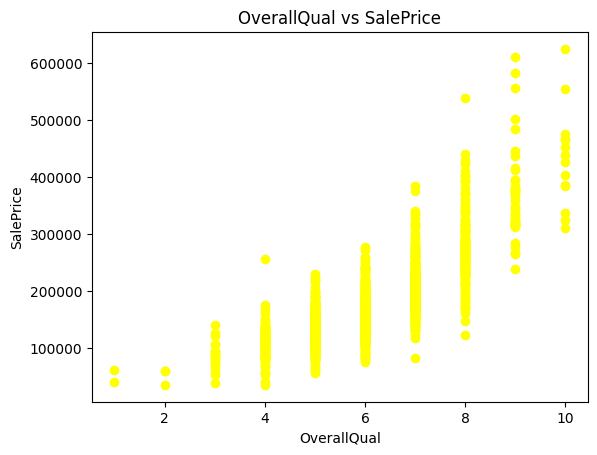

In [ ]:
# OverallQual vs SalePrice
plt.scatter(df['OverallQual'], df['SalePrice'], color='yellow')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs SalePrice')
plt.show()

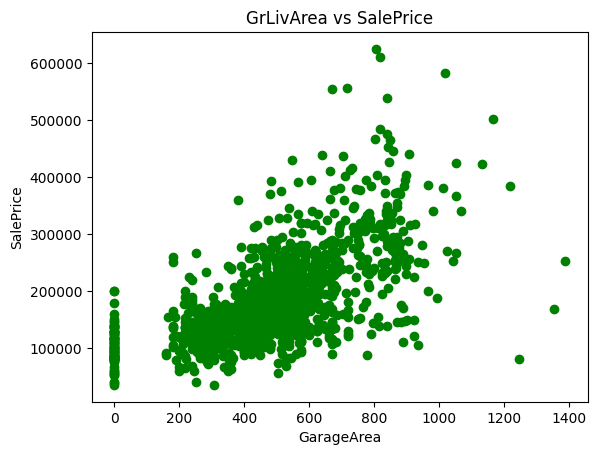

In [ ]:
# GrLivArea vs SalePrice
plt.scatter(df['GarageArea'], df['SalePrice'], color='green')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.show()

Scatter plots of OverallQual and GrLivArea against SalePrice show strong positive relationships with the target variable. Higher OverallQual and larger living areas are associated with higher houses prices, confirming the results of the correlation analysis.

# PAIR PLOT:-

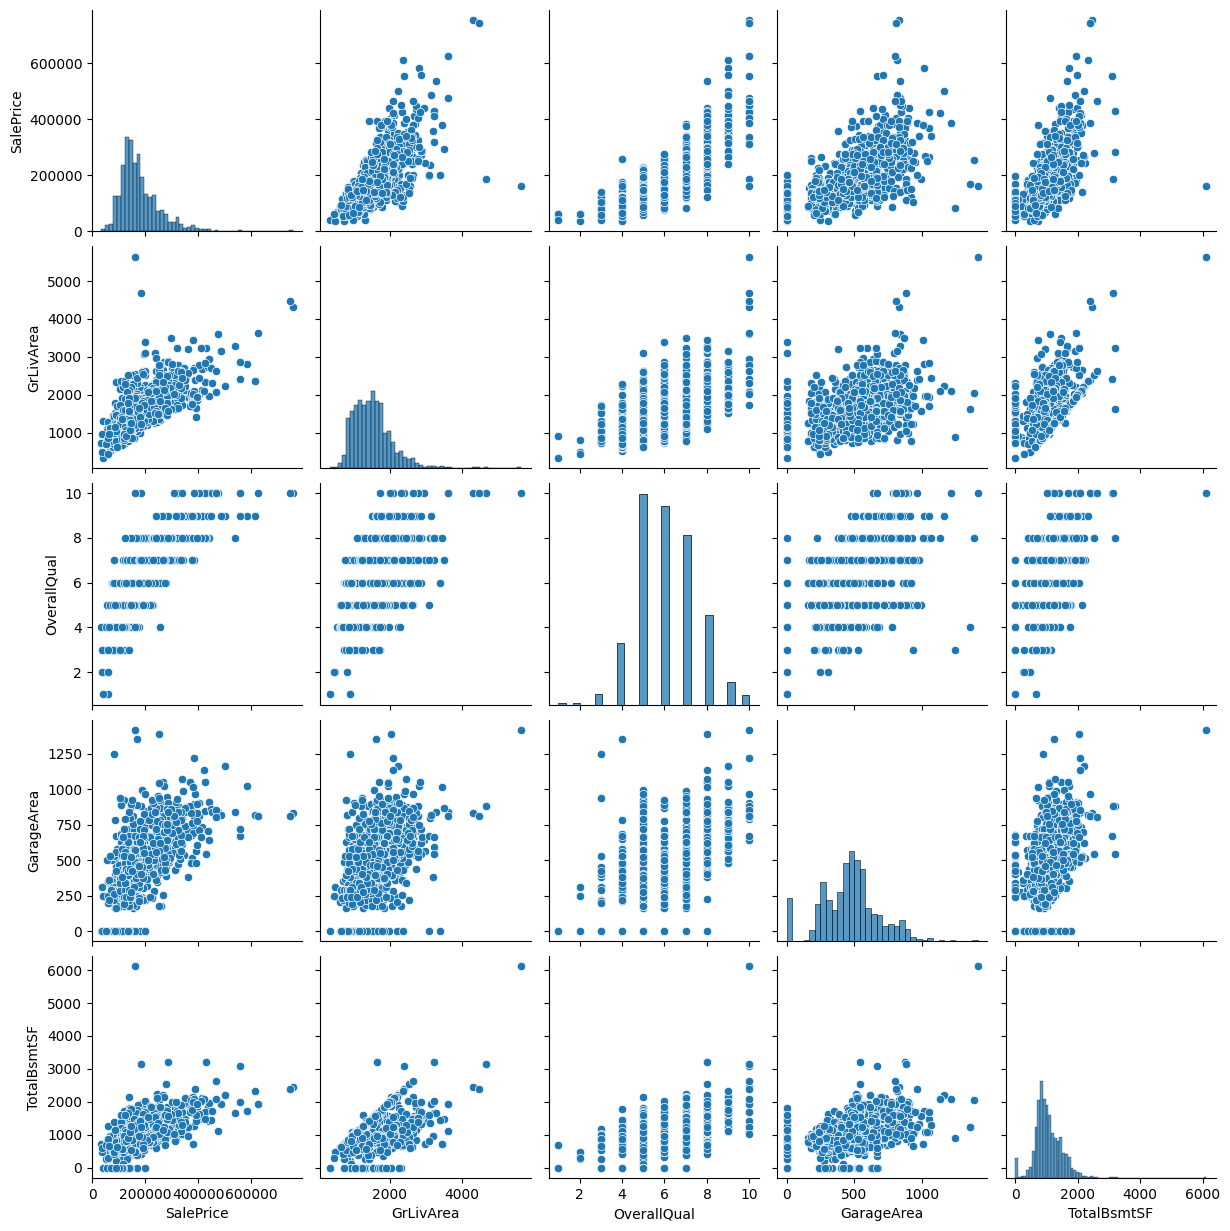

In [ ]:
# Pair Plot

cols = ['SalePrice', 'GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF']

sns.pairplot(df[cols]),

plt.show()

The Pair plot was used to visually examine relationships among numerical variables. while some features showed moderate linear relationships,no strong linear dependency was observed between independent variables. this indicates the absence of severe multicollinearity.the relationships observed were consistent with correlation matrix results.

# Prediction:-
Based on the analysis, housing prices can be predicted using features such as living area, location related variables, and overall quality. Larger living areas generally result in higher predicted house prices. The predictions helps buyers and sellers make better decisions.

# Conclusion:-
In this project, exploratory data analysis was performed on the housing dataset.Various visualizations were used to understand data distributions, trends and relationships. Outliers were identified and handled to improve data quality. The analysis shows that features like living area have a strong influence on house prices.

# THANK YOU.